# 1Ïùº ÌõÑÏùò ÌïòÏàòÏ≤òÎ¶¨Îüâ ÏòàÏ∏° Î™®Îç∏ÎßÅ
---
### Î¨¥ÏóáÏùÑ? 
- 1Ïùº ÌõÑÏùò ÌïòÏàòÏ≤òÎ¶¨Îüâ

### Ïñ¥ÎñªÍ≤å? 
- ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä
- EDA Í∞ÑÎã®ÌïòÍ≤å Îã§Ïãú ÏßÑÌñâ
- Î™®Îç∏Ïóê Ïì∞ÏßÄ ÏïäÏùÑ Ïª¨Îüº Ï†úÍ±∞
- Î™®Îç∏ ÌïôÏäµ, ÌïôÏäµ Í≤∞Í≥º ÎπÑÍµê
- 10Îã®Í≥Ñ Îã§Ï§ëÎ∂ÑÎ•ò ÏÑºÌÑ∞Î≥ÑÎ°ú

### Ïôú?
- Ïò§ÎäòÍπåÏßÄÏùò Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú ÎÇ¥ÏùºÏùò ÌïòÏàòÏ≤òÎ¶¨ÎüâÏùÑ ÏòàÏ∏°ÌïòÏó¨ ÌïÑÏöîÌïú ÏóêÎÑàÏßÄ, ÏûêÏõê Îì±ÏùÑ ÎçîÏö± Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Í∑ºÍ±∞Î•º ÎßàÎ†®ÌïòÍ≥†Ïûê Ìï®

### Ïñ¥Îñ§ Î™®Îç∏ÏùÑ?
1. ÌöåÍ∑Ä Î™®Îç∏
2. LSTM, GRU
3. TabNet

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
# plt.rcParams['font.family'] ='Malgun Gothic' # ÏúàÎèÑÏö∞
plt.rcParams['font.family'] ='AppleGothic' # Îß•
# Îß•, ÏúàÎèÑÏö∞ Ï§ë Í∞ÄÎä•ÌïúÍ±∞Î°ú
# plt.rcParams['font.family'] = ['AppleGothic', 'Malgun Gothic', 'NanumGothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

### ÌååÏÉùÎ≥ÄÏàò
- ÎÇ†Ïßú ÌååÏÉù 
    - Ìä∏Î¶¨ Í≥ÑÏó¥(ÎûúÎç§Ìè¨Î†àÏä§Ìä∏/LightGBM/XGBoost): 
        - Ïõî=1..12 Í∞ôÏùÄ Ï†ïÏàòÎèÑ ÍΩ§ Ïûò Îã§Î£®ÏßÄÎßå, **12‚Üî1Ïùò Ïó∞ÏÜçÏÑ±(ÏõêÌòïÏÑ±)**ÏùÄ Î™ª ÎäêÎÇå
        - Í∑∏ÎûòÏÑú 12ÏõîÍ≥º 1ÏõîÏù¥ Î©ÄÎ¶¨ Îñ®Ïñ¥ÏßÑ Í∞íÏúºÎ°ú Ïù∏ÏãùÎê† Ïàò ÏûàÏùå
        - = sin/cosÎ°ú ÏàúÌôò Ïù∏ÏΩîÎî©ÌïòÎ©¥ ÏõîÎßê->ÏõîÏ¥à Í≤ΩÍ≥ÑÍ∞Ä Îß§ÎÅÑÎüΩÍ≤å Ïù¥Ïñ¥Ï†∏ÏÑú Î≥¥ÌÜµ ÏÜåÌè≠Ïù¥ÎùºÎèÑ Ï¢ãÏïÑÏßê
    - ÏÑ†Ìòï/Ïã†Í≤ΩÎßù Í≥ÑÏó¥(ÏÑ†ÌòïÌöåÍ∑Ä, Lasso/Ridge, MLP, LSTM Îì±): 
        - ÏàòÏπò ÏûêÏ≤¥Ïùò ÏàúÏÑúÏóê ÎØºÍ∞êÌï¥ÏÑú, sin/cos ÏàúÌôò Ïù∏ÏΩîÎî©Ïù¥ Í±∞Ïùò ÌïÑÏàò
        - ÎòêÌïú ÏöîÏùº Ìö®Í≥ºÍ∞Ä ÏïΩÌï¥ÎèÑ, Ïõî/Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±ÏùÄ Í∞ïÌñàÏúºÎãà, ÏµúÏÜåÌïú Ïõî/Ïó∞Í∞Ñ(Ïùº-Ïò§Î∏å-Ïù¥Ïñ¥) Ï£ºÍ∏∞Îäî sin/cosÎ°ú Ïì∞Îäî Í≤å Ïù¥ÎìùÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº
        - Ïó∞ÏùÄ Ï∂îÏÑ∏ ÏÑ±Í≤©Ïù¥Îùº **Í∑∏ÎÉ• Ïà´Ïûê(ÎòêÎäî ÌëúÏ§ÄÌôî)**Î°ú ÎëêÎäî Í≤å Î≥¥ÌÜµ Îçî „Ñ±„Öä

==> Í∏∞Ï°¥Ïóê EDA ÌïòÎ©¥ÏÑú Ï∂îÍ∞ÄÌïú ÌååÏÉùÎ≥ÄÏàòÏóêÏÑú ÏàòÏ†ï

In [161]:
nanji = pd.read_csv('../data/processed/center_season/nanji/ÎÇúÏßÄ_merged.csv', encoding='utf-8-sig')
# nanji = pd.read_csv('../data/processed/center_season/nanji/nanji_for_eda.csv', encoding='utf-8-sig')
jungnang = pd.read_csv('../data/processed/center_season/jungnang/Ï§ëÎûë_merged.csv', encoding='utf-8-sig')
seonam = pd.read_csv('../data/processed/center_season/seonam/ÏÑúÎÇ®_merged.csv', encoding='utf-8-sig')
tancheon = pd.read_csv('../data/processed/center_season/tancheon/ÌÉÑÏ≤ú_merged.csv', encoding='utf-8-sig')

print(nanji.info())
print(jungnang.info())
print(seonam.info())
print(tancheon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ÎÇ†Ïßú             3103 non-null   object 
 1   ÏöîÏùº             3103 non-null   object 
 2   Í≥µÌú¥Ïùº            3103 non-null   int64  
 3   Î™©ÏöïÏû•ÏóÖ           3103 non-null   int64  
 4   ÏÑ∏ÌÉÅÏóÖ            3103 non-null   int64  
 5   ÏàòÏòÅÏû•ÏóÖ           3103 non-null   int64  
 6   Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ        3103 non-null   int64  
 7   Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ         3103 non-null   int64  
 8   ÌïòÏ≤ú             3103 non-null   float64
 9   ÏÉùÌôúÏù∏Íµ¨           3103 non-null   float64
 10  Î∂àÏæåÏßÄÏàò(DI)       3103 non-null   float64
 11  Î∂àÏæåÏßÄÏàòÎì±Í∏â         3103 non-null   object 
 12  Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)     3103 non-null   float64
 13  Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)     3103 non-null   float64
 14  Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)     3103 non-null   float64
 15  Ïùº_ÏµúÍ≥†Í∏∞Ï

In [162]:
'''# ÏïàÏ†Ñ: ÎÇ†Ïßú Ï†ïÎ†¨„ÖÅ
nanji['ÎÇ†Ïßú'] = pd.to_datetime(nanji['ÎÇ†Ïßú'])
nanji = nanji.sort_values('ÎÇ†Ïßú').reset_index(drop=True)
# ÎÇúÏßÄ 6Ïõî Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå -> Îã§ 0ÏúºÎ°ú ÎêòÏñ¥ ÏûàÏúºÎãàÍπå Ï†úÍ±∞ 
nanji = nanji[nanji["ÎÇ†Ïßú"] < "2025-06-01"] 

# ÎÇ†Ïßú ÌååÏÉù (ÏàúÌôò Ïù∏ÏΩîÎî©)
def add_cyclical_features(df, date_col='ÎÇ†Ïßú'):
    d = df[date_col].dt

    # Ïõî
    df['Ïõî_sin'] = np.sin(2*np.pi*d.month/12)
    df['Ïõî_cos'] = np.cos(2*np.pi*d.month/12)

    # ÏöîÏùº
    dow = d.weekday
    df['ÏöîÏùº_sin'] = np.sin(2*np.pi*dow/7)
    df['ÏöîÏùº_cos'] = np.cos(2*np.pi*dow/7)

    # Ïó∞Ï§ëÏùº
    doy = d.dayofyear
    df['Ïó∞Ï§ëÏùº_sin'] = np.sin(2*np.pi*doy/365.25)
    df['Ïó∞Ï§ëÏùº_cos'] = np.cos(2*np.pi*doy/365.25)
    return df

nanji = add_cyclical_features(nanji)

# ÎùºÍ∑∏ (lag) : Í≥ºÍ±∞ Í∞í
add_lag_specs = {
    'Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)': [1, 3],
    'Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)': [1, 3],
    'Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)': [1, 3],
    'ÌèâÍ∑†ÏäµÎèÑ(%)': [1, 3],
    'Î∂àÏæåÏßÄÏàò(DI)': [1, 3],
    'ÌïòÏ≤ú': [1, 3],
    'Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)': [1],  # ÏòÅÌñ• ÏïΩÌï† Ïàò ÏûàÏñ¥ Í∞ÄÎ≥çÍ≤å
    'Ìï©Í≥Ñ': [1,3,7],
    'ÏÉùÌôúÏù∏Íµ¨': [1,3,7],
    'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)': [1,3],
}
for col, lags in add_lag_specs.items():
    for L in lags:
        nanji[f'{col}_lag{L}'] = nanji[col].shift(L)

# Î°§ÎßÅ (Ïò§ÎäòÍπåÏßÄ) : ÎàÑÏ†ÅÍ∞í
nanji['Ìï©Í≥Ñ_roll7_mean'] = nanji['Ìï©Í≥Ñ'].rolling(7, min_periods=1).mean()
nanji['Ìï©Í≥Ñ_roll7_std']  = nanji['Ìï©Í≥Ñ'].rolling(7, min_periods=2).std()
nanji['ÏÉùÌôúÏù∏Íµ¨_roll7_mean'] = nanji['ÏÉùÌôúÏù∏Íµ¨'].rolling(7, min_periods=1).mean()
nanji['Í∞ïÏàòÎüâ_roll3_sum'] = nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].rolling(3, min_periods=1).sum()
nanji['Í∞ïÏàòÎüâ_roll7_sum'] = nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].rolling(7, min_periods=1).sum()

# Î≥ÄÌôîÏú®/Ï¶ùÍ∞ê
'''
# nanji['Ìï©Í≥Ñ_Ï†ÑÏùºÏ¶ùÍ∞êÎ•†']    = nanji['Ìï©Í≥Ñ'].pct_change()
# nanji['Ìï©Í≥Ñ_Ï†ÑÏùºÎ≥ÄÌôî']      = nanji['Ìï©Í≥Ñ'].diff()
# nanji['ÏÉùÌôúÏù∏Íµ¨_Ï†ÑÏùºÏ¶ùÍ∞êÎ•†'] = nanji['ÏÉùÌôúÏù∏Íµ¨'].pct_change()
# nanji['Í∞ïÏàòÎüâ_Ï†ÑÏùºÎ≥ÄÌôî']    = nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].diff()
'''

# ÎÇ†Ïî®/Ïù¥Î≤§Ìä∏
nanji['ÏùºÍµêÏ∞®']   = nanji['Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)'] - nanji['Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)']
nanji['Ï≤¥Í∞êÏò®ÎèÑ'] = nanji['Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)'] - 0.7*nanji['Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)']
nanji['ÏäµÎèÑÏ∞®Ïù¥'] = nanji['ÏµúÍ≥†ÏäµÎèÑ(%)'] - nanji['ÏµúÏ†ÄÏäµÎèÑ(%)']

nanji['Í∞ïÏàò_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'] > 0).astype(int)
nanji['Ìè≠Ïö∞_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'] >= 80).astype(int)
nanji['Ìè≠ÏóºÏùº']    = (nanji['Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)'] >= 33).astype(int)
# nanji['ÌïúÌåå_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)'] <= -12).astype(int)

# Ïù∏ÌóàÍ∞Ä ÌååÏÉù
# nanji['Ïù∏ÌóàÍ∞Ä'] = nanji[['Î™©ÏöïÏû•ÏóÖ','ÏÑ∏ÌÉÅÏóÖ','ÏàòÏòÅÏû•ÏóÖ','Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ','Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ']].sum(axis=1)

# ÌÉÄÍπÉ ÏÉùÏÑ±
nanji['Ìï©Í≥Ñ_1ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-1)
nanji['Ìï©Í≥Ñ_2ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-2)

# ÏöîÏùº Ïà´ÏûêÎ°ú
nanji['ÏöîÏùº_Ïà´Ïûê'] = nanji['ÎÇ†Ïßú'].dt.weekday # 0:ÏõîÏöîÏùº, 1:ÌôîÏöîÏùº, ... , 6:ÏùºÏöîÏùº

# Í≥ÑÏ†à, Î∂àÏæåÏßÄÏàòÎì±Í∏â Ïà´ÏûêÎ°ú
nanji = nanji.replace(
    {
        'Í≥ÑÏ†à': {'Î¥Ñ': 0, 'Ïó¨Î¶Ñ' : 1, 'Í∞ÄÏùÑ' : 2, 'Í≤®Ïö∏' : 3},
        'Î∂àÏæåÏßÄÏàòÎì±Í∏â' : {'ÏæåÏ†Å' : 0, 'ÏïΩÍ∞Ñ Î∂àÏæå' : 1, 'Î∂àÏæå' : 2, 'Îß§Ïö∞ Î∂àÏæå' : 3, 'Í∑πÏã¨Ìïú Î∂àÏæå' : 4}
     })



nanji.columns
'''

"\n\n# ÎÇ†Ïî®/Ïù¥Î≤§Ìä∏\nnanji['ÏùºÍµêÏ∞®']   = nanji['Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)'] - nanji['Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)']\nnanji['Ï≤¥Í∞êÏò®ÎèÑ'] = nanji['Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)'] - 0.7*nanji['Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)']\nnanji['ÏäµÎèÑÏ∞®Ïù¥'] = nanji['ÏµúÍ≥†ÏäµÎèÑ(%)'] - nanji['ÏµúÏ†ÄÏäµÎèÑ(%)']\n\nnanji['Í∞ïÏàò_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'] > 0).astype(int)\nnanji['Ìè≠Ïö∞_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'] >= 80).astype(int)\nnanji['Ìè≠ÏóºÏùº']    = (nanji['Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)'] >= 33).astype(int)\n# nanji['ÌïúÌåå_Ïó¨Î∂Ä'] = (nanji['Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)'] <= -12).astype(int)\n\n# Ïù∏ÌóàÍ∞Ä ÌååÏÉù\n# nanji['Ïù∏ÌóàÍ∞Ä'] = nanji[['Î™©ÏöïÏû•ÏóÖ','ÏÑ∏ÌÉÅÏóÖ','ÏàòÏòÅÏû•ÏóÖ','Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ','Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ']].sum(axis=1)\n\n# ÌÉÄÍπÉ ÏÉùÏÑ±\nnanji['Ìï©Í≥Ñ_1ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-1)\nnanji['Ìï©Í≥Ñ_2ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-2)\n\n# ÏöîÏùº Ïà´ÏûêÎ°ú\nnanji['ÏöîÏùº_Ïà´Ïûê'] = nanji['ÎÇ†Ïßú'].dt.weekday # 0:ÏõîÏöîÏùº, 1:ÌôîÏöîÏùº, ... , 6:ÏùºÏöîÏùº\n\n# Í≥ÑÏ†

In [163]:
def make_features(df):
    df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
    df = df.sort_values('ÎÇ†Ïßú').reset_index(drop=True)
    # ÎÇúÏßÄ, ÏÑúÎÇ® 6Ïõî Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå -> Îã§ 0ÏúºÎ°ú ÎêòÏñ¥ ÏûàÏúºÎãàÍπå Ï†úÍ±∞ 
    df = df[df["ÎÇ†Ïßú"] < "2025-06-01"] 

    df['Ïõî'] = df['ÎÇ†Ïßú'].dt.month #Ïõî
    df['ÏöîÏùº_Ïà´Ïûê'] = df['ÎÇ†Ïßú'].dt.weekday # 0:ÏõîÏöîÏùº, 1:ÌôîÏöîÏùº, ... , 6:ÏùºÏöîÏùº -> ÏöîÏùº Ïà´ÏûêÎ°ú

    # Í≥ÑÏ†à, Î∂àÏæåÏßÄÏàòÎì±Í∏â Ïà´ÏûêÎ°ú
    season_map = {'Î¥Ñ': 0, 'Ïó¨Î¶Ñ': 1, 'Í∞ÄÏùÑ': 2, 'Í≤®Ïö∏': 3}
    discomfort_map = {'ÏæåÏ†Å': 0, 'ÏïΩÍ∞Ñ Î∂àÏæå': 1, 'Î∂àÏæå': 2, 'Îß§Ïö∞ Î∂àÏæå': 3, 'Í∑πÏã¨Ìïú Î∂àÏæå': 4}
    df['Í≥ÑÏ†à'] = df['Í≥ÑÏ†à'].map(season_map).astype('Int64')
    df['Î∂àÏæåÏßÄÏàòÎì±Í∏â'] = df['Î∂àÏæåÏßÄÏàòÎì±Í∏â'].map(discomfort_map).astype('Int64')

    df['Í∞ïÏàòÎüâ_1ÏùºÏ†Ñ'] = df['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].shift(1)
    df['Í∞ïÏàòÎüâ_2ÏùºÏ†Ñ'] = df['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].shift(2)

    # ÌÉÄÍ≤ü
    df['Ìï©Í≥Ñ_1ÏùºÌõÑ'] = df['Ìï©Í≥Ñ'].shift(-1)
    df['Ìï©Í≥Ñ_2ÏùºÌõÑ'] = df['Ìï©Í≥Ñ'].shift(-2)
    
    df = df.dropna().reset_index(drop=True)
    
    return df

nanji = make_features(nanji)
jungnang = make_features(jungnang)
seonam = make_features(seonam)
tancheon = make_features(tancheon)


'''
nanji['ÎÇ†Ïßú'] = pd.to_datetime(nanji['ÎÇ†Ïßú'])
nanji = nanji.sort_values('ÎÇ†Ïßú').reset_index(drop=True)
# ÎÇúÏßÄ 6Ïõî Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå -> Îã§ 0ÏúºÎ°ú ÎêòÏñ¥ ÏûàÏúºÎãàÍπå Ï†úÍ±∞ 
nanji = nanji[nanji["ÎÇ†Ïßú"] < "2025-06-01"] 

nanji['Ïõî'] = nanji['ÎÇ†Ïßú'].dt.month #Ïõî
nanji['ÏöîÏùº_Ïà´Ïûê'] = nanji['ÎÇ†Ïßú'].dt.weekday # 0:ÏõîÏöîÏùº, 1:ÌôîÏöîÏùº, ... , 6:ÏùºÏöîÏùº -> ÏöîÏùº Ïà´ÏûêÎ°ú

# Í≥ÑÏ†à, Î∂àÏæåÏßÄÏàòÎì±Í∏â Ïà´ÏûêÎ°ú
season_map = {'Î¥Ñ': 0, 'Ïó¨Î¶Ñ': 1, 'Í∞ÄÏùÑ': 2, 'Í≤®Ïö∏': 3}
discomfort_map = {'ÏæåÏ†Å': 0, 'ÏïΩÍ∞Ñ Î∂àÏæå': 1, 'Î∂àÏæå': 2, 'Îß§Ïö∞ Î∂àÏæå': 3, 'Í∑πÏã¨Ìïú Î∂àÏæå': 4}
nanji['Í≥ÑÏ†à'] = nanji['Í≥ÑÏ†à'].map(season_map).astype('Int64')
nanji['Î∂àÏæåÏßÄÏàòÎì±Í∏â'] = nanji['Î∂àÏæåÏßÄÏàòÎì±Í∏â'].map(discomfort_map).astype('Int64')

nanji['Í∞ïÏàòÎüâ_1ÏùºÏ†Ñ'] = nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].shift(1)
nanji['Í∞ïÏàòÎüâ_2ÏùºÏ†Ñ'] = nanji['Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)'].shift(2)

# ÌÉÄÍ≤ü
nanji['Ìï©Í≥Ñ_1ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-1)
nanji['Ìï©Í≥Ñ_2ÏùºÌõÑ'] = nanji['Ìï©Í≥Ñ'].shift(-2)
'''

'\nnanji[\'ÎÇ†Ïßú\'] = pd.to_datetime(nanji[\'ÎÇ†Ïßú\'])\nnanji = nanji.sort_values(\'ÎÇ†Ïßú\').reset_index(drop=True)\n# ÎÇúÏßÄ 6Ïõî Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå -> Îã§ 0ÏúºÎ°ú ÎêòÏñ¥ ÏûàÏúºÎãàÍπå Ï†úÍ±∞ \nnanji = nanji[nanji["ÎÇ†Ïßú"] < "2025-06-01"] \n\nnanji[\'Ïõî\'] = nanji[\'ÎÇ†Ïßú\'].dt.month #Ïõî\nnanji[\'ÏöîÏùº_Ïà´Ïûê\'] = nanji[\'ÎÇ†Ïßú\'].dt.weekday # 0:ÏõîÏöîÏùº, 1:ÌôîÏöîÏùº, ... , 6:ÏùºÏöîÏùº -> ÏöîÏùº Ïà´ÏûêÎ°ú\n\n# Í≥ÑÏ†à, Î∂àÏæåÏßÄÏàòÎì±Í∏â Ïà´ÏûêÎ°ú\nseason_map = {\'Î¥Ñ\': 0, \'Ïó¨Î¶Ñ\': 1, \'Í∞ÄÏùÑ\': 2, \'Í≤®Ïö∏\': 3}\ndiscomfort_map = {\'ÏæåÏ†Å\': 0, \'ÏïΩÍ∞Ñ Î∂àÏæå\': 1, \'Î∂àÏæå\': 2, \'Îß§Ïö∞ Î∂àÏæå\': 3, \'Í∑πÏã¨Ìïú Î∂àÏæå\': 4}\nnanji[\'Í≥ÑÏ†à\'] = nanji[\'Í≥ÑÏ†à\'].map(season_map).astype(\'Int64\')\nnanji[\'Î∂àÏæåÏßÄÏàòÎì±Í∏â\'] = nanji[\'Î∂àÏæåÏßÄÏàòÎì±Í∏â\'].map(discomfort_map).astype(\'Int64\')\n\nnanji[\'Í∞ïÏàòÎüâ_1ÏùºÏ†Ñ\'] = nanji[\'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)\'].shift(1)\nnanji[\'Í∞ïÏàòÎüâ_2ÏùºÏ†Ñ\'] = nanji[\'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)\'].shift(2)\n\n# ÌÉÄÍ≤ü\nnanji[\'Ìï©Í≥Ñ_1

In [ ]:
# ÎÑê Í∞í Îã§ Ï†úÎåÄÎ°ú Ï≤òÎ¶¨ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print(nanji.isnull().sum()[nanji.isnull().sum() > 0])
print(seonam.isnull().sum()[seonam.isnull().sum() > 0])
print(jungnang.isnull().sum()[jungnang.isnull().sum() > 0])
print(tancheon.isnull().sum()[tancheon.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


In [166]:
jungnang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ÎÇ†Ïßú             3069 non-null   datetime64[ns]
 1   ÏöîÏùº             3069 non-null   object        
 2   Í≥µÌú¥Ïùº            3069 non-null   int64         
 3   Î™©ÏöïÏû•ÏóÖ           3069 non-null   int64         
 4   ÏÑ∏ÌÉÅÏóÖ            3069 non-null   int64         
 5   ÏàòÏòÅÏû•ÏóÖ           3069 non-null   int64         
 6   Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ        3069 non-null   int64         
 7   Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ         3069 non-null   int64         
 8   ÌïòÏ≤ú             3069 non-null   float64       
 9   ÏÉùÌôúÏù∏Íµ¨           3069 non-null   float64       
 10  Î∂àÏæåÏßÄÏàò(DI)       3069 non-null   float64       
 11  Î∂àÏæåÏßÄÏàòÎì±Í∏â         3069 non-null   Int64         
 12  Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)     3069 non-null   float64       
 13  Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞

In [118]:
nanji.columns

Index(['ÎÇ†Ïßú', 'ÏöîÏùº', 'Í≥µÌú¥Ïùº', 'Î™©ÏöïÏû•ÏóÖ', 'ÏÑ∏ÌÉÅÏóÖ', 'ÏàòÏòÅÏû•ÏóÖ', 'Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ', 'Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ', 'ÌïòÏ≤ú',
       'ÏÉùÌôúÏù∏Íµ¨', 'Î∂àÏæåÏßÄÏàò(DI)', 'Î∂àÏæåÏßÄÏàòÎì±Í∏â', 'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)', 'Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)', 'Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)',
       'Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)', 'Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)', 'Ïùº_ÏµúÎåÄÏàúÍ∞ÑÌíçÏÜç(m/s)', 'ÏµúÏ†ÄÏäµÎèÑ(%)', 'ÌèâÍ∑†ÏäµÎèÑ(%)',
       'ÏµúÍ≥†ÏäµÎèÑ(%)', 'ÏäµÎèÑÌëúÏ§ÄÌé∏Ï∞®', '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•', 'Ìï©Í≥Ñ', 'Í≥ÑÏ†à', 'Ïõî',
       'ÏöîÏùº_Ïà´Ïûê', 'Í∞ïÏàòÎüâ_1ÏùºÏ†Ñ', 'Í∞ïÏàòÎüâ_2ÏùºÏ†Ñ', 'Ìï©Í≥Ñ_1ÏùºÌõÑ', 'Ìï©Í≥Ñ_2ÏùºÌõÑ'],
      dtype='object')

In [119]:
# ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Ïª¨Îüº
'''
Î™©Ìëú: y_{t+1} = ÎÇ¥Ïùº ÌïòÏàòÏ≤òÎ¶¨Îüâ
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ï†ïÎ≥¥: ÏãúÏ†ê t (Ïò§ÎäòÍπåÏßÄ) Ïùò Í¥ÄÏ∏°Í∞í
ÏÇ¨Ïö©ÌïòÎ©¥ Ïïà ÎêòÎäî Ï†ïÎ≥¥: ÏãúÏ†ê t+1 (ÎÇ¥Ïùº Ïù¥ÌõÑ) Ïùò Í¥ÄÏ∏°Í∞í
'''
not_use_col = [
    # ÎÇ†Ïßú ÏõêÎ≥∏
    'ÎÇ†Ïßú', 
    # Î≤îÏ£ºÌòï Ïª¨Îüº
    'ÏöîÏùº',
    # 1Ïùº ÌõÑ Ìï©Í≥ÑÏóê ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï£ºÎäî Í∞í
    '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•',
    # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º ÏßÅÏ†ë ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÎ≥¥Îã§ lag, rolling Í∞í ÏÇ¨Ïö©Ïù¥ Îçî ÏïàÏ†ÑÌï†ÏàòÎèÑ?
    #'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)', 'ÏÉùÌôúÏù∏Íµ¨',
    # ÌÉÄÍ≤üÍ∞í
    'Ìï©Í≥Ñ_1ÏùºÌõÑ', 'Ìï©Í≥Ñ_2ÏùºÌõÑ'
]



### Î™®Îç∏ÎßÅ - ÎãπÏùº Ìï©Í≥Ñ

In [120]:
TARGET = 'Ìï©Í≥Ñ'
not_use_col = [
    'ÎÇ†Ïßú',         # ÎÇ†Ïßú ÏõêÎ≥∏ (ÏàúÌôò Ïù∏ÏΩîÎî© ÌîºÏ≤òÎ°ú ÎåÄÏ≤¥)
    'ÏöîÏùº',         # ÏõêÎ≥∏ ÏöîÏùº Ïª¨Îüº (Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ Ï†úÍ±∞)
    '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•',        # ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ, Ï†ïÎ≥¥ ÎàÑÏàò ÏúÑÌóò
    'Ìï©Í≥Ñ',
    'Ìï©Í≥Ñ_1ÏùºÌõÑ',    # ÌÉÄÍ≤ü Î≥ÄÏàò
    'Ìï©Í≥Ñ_2ÏùºÌõÑ',    # ÎØ∏Îûò Ï†ïÎ≥¥
]

# nanji Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ïª¨ÎüºÏùÄ not_use_col Î¶¨Ïä§Ìä∏ÏóêÏÑú Ï†úÏô∏
not_use_col = [col for col in not_use_col if col in nanji.columns]

# ÏúÑ Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Î≥ÄÏàòÎ•º ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©
features = [col for col in nanji.columns if col not in not_use_col]

y = nanji[TARGET]
X = nanji[features]

# ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏàúÏÑúÍ∞Ä Ïú†ÏßÄÎêòÎèÑÎ°ù shuffle=False ÏÑ§Ï†ï
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print("--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---")
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_train.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_test.shape}")
print(f"ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: {len(features)}")

# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
models = {
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100),
    'CatBoost': CatBoostRegressor(random_state=42, n_estimators=100, verbose=0)
}

evaluation_results = []
for name, model in models.items():
    print(f" {name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name, 
        'MAE': mae, 
        'MSE': mse, 
        'RMSE': rmse, 
        'R2 Score': r2
    })

eval_df = pd.DataFrame(evaluation_results).set_index('Model')

print("\n ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(eval_df)
eval_df.to_csv('model_evaluation_final.csv')

#  Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
    sns.barplot(x=imp.values, y=imp.index, ax=axes[i], palette='viridis', hue=imp.index, legend=False)
    axes[i].set_title(f'{name} Î≥ÄÏàò Ï§ëÏöîÎèÑ (Top 20)')
    axes[i].set_xlabel('Ï§ëÏöîÎèÑ')
    axes[i].set_ylabel('Î≥ÄÏàò')

plt.tight_layout()
plt.savefig('feature_importances_ALL_final.png')
plt.close(fig)
print("\n'feature_importances_ALL_final.png' ÌååÏùº Ï†ÄÏû•")

# Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌïú SHAP Î∂ÑÏÑù
print("\n Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌï¥ SHAP Î∂ÑÏÑù ÏàòÌñâ...")
for name, model in models.items():
    print(f"{name} Î™®Îç∏ Î∂ÑÏÑù Ï§ë...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # SHAP Summary Plot Ï†ÄÏû•
    plt.figure()
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title(f'{name} SHAP ÏöîÏïΩ ÌîåÎ°Ø')
    plt.tight_layout()
    plt.savefig(f'shap_summary_{name}_final.png')
    plt.close()

    # SHAP Force Plot Ï†ÄÏû• (Ï≤´ Î≤àÏß∏ ÏòàÏ∏°Ïóê ÎåÄÌï¥)
    plt.figure()
    try:
        shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True, show=False)
        plt.title(f'SHAP Force Plot for {name}')
        plt.tight_layout()
        plt.savefig(f'shap_force_{name}_final.png', bbox_inches='tight')
    except Exception as e:
        print(f"{name} Î™®Îç∏Ïùò Force Plot ÏÉùÏÑ± Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    finally:
        plt.close()

print("\n Î™®Îì† Î∂ÑÏÑù ÏôÑÎ£å")

# ÌòÑÏû¨ Î™®Îç∏ Ï§ë Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò CatBoostÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
selector_model = models['CatBoost']
importances = pd.Series(selector_model.feature_importances_, index=X_train.columns)

# Í∞ÄÏû• Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 25Í∞ú ÌîºÏ≤ò ÏÑ†ÌÉù
top_n_features = importances.sort_values(ascending=False).head(25).index.tolist()

print("---  CatBoostÍ∞Ä ÏÑ†ÌÉùÌïú Top 25 ÌïµÏã¨ ÌîºÏ≤ò ---")
print(top_n_features)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎì§Îßå ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è ÌèâÍ∞Ä
print("\n--- ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---")
evaluation_results_selected = []
for name, model in models.items():
    print(f" {name} Î™®Îç∏ Ïû¨ÌïôÏäµ Ï§ë...")
    # ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    r2 = r2_score(y_test, y_pred)
    evaluation_results_selected.append({'Model': name, 'R2 Score (Selected)': r2})

eval_df_selected = pd.DataFrame(evaluation_results_selected).set_index('Model')

print("\nÌîºÏ≤ò ÏÑ†ÌÉù ÌõÑ ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(eval_df_selected)

--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (2455, 25)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (614, 25)
ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: 25
 RandomForest Î™®Îç∏ ÌïôÏäµ Ï§ë...
 XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
 LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4000
[LightGBM] [Info] Number of data points in the train set: 2455, number of used features: 25
[LightGBM] [Info] Start training from score 605082.899733
 CatBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...

 ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:
                       MAE           MSE          RMSE  R2 Score
Model                                                           
RandomForest  31549.618950  3.024734e+09  54997.584444  0.828102
XGBoost       32133.654652  3.440037e+09  58651.828713  0.804500
LightGBM   

In [121]:
eval_df

MAE           MSE          RMSE  R2 Score
Model                                                           
RandomForest  31549.618950  3.024734e+09  54997.584444  0.828102
XGBoost       32133.654652  3.440037e+09  58651.828713  0.804500
LightGBM      30767.555106  2.783061e+09  52754.720818  0.841837
CatBoost      32090.054497  3.223744e+09  56778.024251  0.816792

In [122]:
eval_df_selected

R2 Score (Selected)
Model                            
RandomForest             0.828980
XGBoost                  0.805283
LightGBM                 0.841724
CatBoost                 0.864313

### Î™®Îç∏ÎßÅ - 1Ïùº ÌõÑ

In [123]:
TARGET = 'Ìï©Í≥Ñ_1ÏùºÌõÑ'
not_use_col = [
    'ÎÇ†Ïßú',         # ÎÇ†Ïßú ÏõêÎ≥∏ (ÏàúÌôò Ïù∏ÏΩîÎî© ÌîºÏ≤òÎ°ú ÎåÄÏ≤¥)
    'ÏöîÏùº',         # ÏõêÎ≥∏ ÏöîÏùº Ïª¨Îüº (Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ Ï†úÍ±∞)
    '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•',        # ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ, Ï†ïÎ≥¥ ÎàÑÏàò ÏúÑÌóò
    'Ìï©Í≥Ñ',
    'Ìï©Í≥Ñ_1ÏùºÌõÑ',    # ÌÉÄÍ≤ü Î≥ÄÏàò
    'Ìï©Í≥Ñ_2ÏùºÌõÑ',    # ÎØ∏Îûò Ï†ïÎ≥¥
]

# nanji Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ïª¨ÎüºÏùÄ not_use_col Î¶¨Ïä§Ìä∏ÏóêÏÑú Ï†úÏô∏
not_use_col = [col for col in not_use_col if col in nanji.columns]

# ÏúÑ Î≥ÄÏàòÎì§ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Î≥ÄÏàòÎ•º ÌîºÏ≤òÎ°ú ÏÇ¨Ïö©
features = [col for col in nanji.columns if col not in not_use_col]

y = nanji[TARGET]
X = nanji[features]

# ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏàúÏÑúÍ∞Ä Ïú†ÏßÄÎêòÎèÑÎ°ù shuffle=False ÏÑ§Ï†ï
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print("--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---")
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_train.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_test.shape}")
print(f"ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: {len(features)}")

# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
models = {
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100),
    'CatBoost': CatBoostRegressor(random_state=42, n_estimators=100, verbose=0)
}

evaluation_results = []
for name, model in models.items():
    print(f" {name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name, 
        'MAE': mae, 
        'MSE': mse, 
        'RMSE': rmse, 
        'R2 Score': r2
    })

eval_df = pd.DataFrame(evaluation_results).set_index('Model')

print("\n ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(eval_df)
eval_df.to_csv('model_evaluation_final.csv')

#  Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌïú Î≥ÄÏàò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
    sns.barplot(x=imp.values, y=imp.index, ax=axes[i], palette='viridis', hue=imp.index, legend=False)
    axes[i].set_title(f'{name} Î≥ÄÏàò Ï§ëÏöîÎèÑ (Top 20)')
    axes[i].set_xlabel('Ï§ëÏöîÎèÑ')
    axes[i].set_ylabel('Î≥ÄÏàò')

plt.tight_layout()
plt.savefig('feature_importances_ALL_final.png')
plt.close(fig)
print("\n'feature_importances_ALL_final.png' ÌååÏùº Ï†ÄÏû•")

# Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌïú SHAP Î∂ÑÏÑù
print("\n Î™®Îì† Î™®Îç∏Ïóê ÎåÄÌï¥ SHAP Î∂ÑÏÑù ÏàòÌñâ...")
for name, model in models.items():
    print(f"{name} Î™®Îç∏ Î∂ÑÏÑù Ï§ë...")
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    # SHAP Summary Plot Ï†ÄÏû•
    plt.figure()
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title(f'{name} SHAP ÏöîÏïΩ ÌîåÎ°Ø')
    plt.tight_layout()
    plt.savefig(f'shap_summary_{name}_final.png')
    plt.close()

    # SHAP Force Plot Ï†ÄÏû• (Ï≤´ Î≤àÏß∏ ÏòàÏ∏°Ïóê ÎåÄÌï¥)
    plt.figure()
    try:
        shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True, show=False)
        plt.title(f'SHAP Force Plot for {name}')
        plt.tight_layout()
        plt.savefig(f'shap_force_{name}_final.png', bbox_inches='tight')
    except Exception as e:
        print(f"{name} Î™®Îç∏Ïùò Force Plot ÏÉùÏÑ± Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    finally:
        plt.close()

print("\n Î™®Îì† Î∂ÑÏÑù ÏôÑÎ£å")

# ÌòÑÏû¨ Î™®Îç∏ Ï§ë Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò CatBoostÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
selector_model = models['CatBoost']
importances = pd.Series(selector_model.feature_importances_, index=X_train.columns)

# Í∞ÄÏû• Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 25Í∞ú ÌîºÏ≤ò ÏÑ†ÌÉù
top_n_features = importances.sort_values(ascending=False).head(25).index.tolist()

print("---  CatBoostÍ∞Ä ÏÑ†ÌÉùÌïú Top 25 ÌïµÏã¨ ÌîºÏ≤ò ---")
print(top_n_features)

# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎì§Îßå ÏÇ¨Ïö©ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è ÌèâÍ∞Ä
print("\n--- ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---")
evaluation_results_selected = []
for name, model in models.items():
    print(f" {name} Î™®Îç∏ Ïû¨ÌïôÏäµ Ï§ë...")
    # ÏÑ†ÌÉùÎêú ÌîºÏ≤òÎ°ú Î™®Îç∏ Ïû¨ÌïôÏäµ
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    r2 = r2_score(y_test, y_pred)
    evaluation_results_selected.append({'Model': name, 'R2 Score (Selected)': r2})

eval_df_selected = pd.DataFrame(evaluation_results_selected).set_index('Model')

print("\nÌîºÏ≤ò ÏÑ†ÌÉù ÌõÑ ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:")
print(eval_df_selected)

--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (2455, 25)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (614, 25)
ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: 25
 RandomForest Î™®Îç∏ ÌïôÏäµ Ï§ë...
 XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
 LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4000
[LightGBM] [Info] Number of data points in the train set: 2455, number of used features: 25
[LightGBM] [Info] Start training from score 604915.189040
 CatBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...

 ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Ï†ÅÏö© ÌõÑ Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º:
                       MAE           MSE          RMSE  R2 Score
Model                                                           
RandomForest  49232.208484  7.488837e+09  86538.064864  0.581418
XGBoost       50742.912193  8.002808e+09  89458.413406  0.552690
LightGBM   

In [124]:
'''
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# 1. Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
lr_pred = lr_model.predict(X_test_final)
lr_r2 = r2_score(y_test, lr_pred)

# 2. LightGBM Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_final, y_train)
lgbm_pred = lgbm_model.predict(X_test_final)
lgbm_r2 = r2_score(y_test, lgbm_pred)

print(f"Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïùò R¬≤ Ï†êÏàò: {lr_r2:.4f}")
print(f"LightGBM Î™®Îç∏Ïùò R¬≤ Ï†êÏàò:       {lgbm_r2:.4f}")
'''

'\nfrom sklearn.linear_model import LinearRegression\nfrom lightgbm import LGBMRegressor\nfrom sklearn.metrics import r2_score\n\n# 1. Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä\nlr_model = LinearRegression()\nlr_model.fit(X_train_final, y_train)\nlr_pred = lr_model.predict(X_test_final)\nlr_r2 = r2_score(y_test, lr_pred)\n\n# 2. LightGBM Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä\nlgbm_model = LGBMRegressor(random_state=42)\nlgbm_model.fit(X_train_final, y_train)\nlgbm_pred = lgbm_model.predict(X_test_final)\nlgbm_r2 = r2_score(y_test, lgbm_pred)\n\nprint(f"Îã®Ïàú ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïùò R¬≤ Ï†êÏàò: {lr_r2:.4f}")\nprint(f"LightGBM Î™®Îç∏Ïùò R¬≤ Ï†êÏàò:       {lgbm_r2:.4f}")\n'

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
# plt.rcParams['font.family'] ='Malgun Gothic' # ÏúàÎèÑÏö∞
plt.rcParams['font.family'] ='AppleGothic' # Îß•
# Îß•, ÏúàÎèÑÏö∞ Ï§ë Í∞ÄÎä•ÌïúÍ±∞Î°ú
# plt.rcParams['font.family'] = ['AppleGothic', 'Malgun Gothic', 'NanumGothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
)

# Îã®Ïàú ÌöåÍ∑Ä/Ïª§ÎÑê/Ïù¥ÏõÉ Î™®Îç∏
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

# Ìä∏Î¶¨ Í≥ÑÏó¥
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Ìï¥ÏÑù
import shap
import seaborn as sns

# Í≤ΩÍ≥† ÏñµÏ†ú(ÏÑ†ÌÉù)
import warnings
warnings.filterwarnings("ignore")




In [126]:
TARGET = 'Ìï©Í≥Ñ_1ÏùºÌõÑ'
USE_RANDOM_SPLIT = False   # TrueÎ°ú Î∞îÍæ∏Î©¥ ÎûúÎç§ Î∂ÑÌï†(ÏãúÍ≥ÑÏó¥ Í≥†Î†§ X)Î°ú Ïã§Ìóò

# ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏùÑ Î≥ÄÏàòÎì§ (ÎØ∏Îûò Ï†ïÎ≥¥, ÏõêÎ≥∏ ID Îì±)
not_use_col = [
    'ÎÇ†Ïßú', 'ÏöîÏùº',
    '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•', 'Ìï©Í≥Ñ',
    'Ìï©Í≥Ñ_1ÏùºÌõÑ', 'Ìï©Í≥Ñ_2ÏùºÌõÑ'
]
not_use_col = [c for c in not_use_col if c in nanji.columns]  # Ïã§Ï†ú ÏûàÎäî Ïª¨ÎüºÎßå Ï†úÏô∏

# ÌîºÏ≤ò/ÌÉÄÍπÉ
features = [c for c in nanji.columns if c not in not_use_col]
X = nanji[features].copy()
y = nanji[TARGET].copy()

# ÏïàÏ†ÑÎßù: Î¨¥ÌïúÎåÄ/Í≤∞Ï∏° Ï≤òÎ¶¨ (ÌïÑÏöî Ïãú Í≥†Í∏â ÎåÄÏπòÎ°ú ÍµêÏ≤¥ Í∞ÄÎä•)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean(numeric_only=True))
valid_idx = y.notna()
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Î∂ÑÌï†
if USE_RANDOM_SPLIT:
    # ÏãúÍ≥ÑÏó¥ Í≥†Î†§ ÏóÜÏù¥ ÎûúÎç§ Î∂ÑÌï†
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    split_desc = "ÎûúÎç§ Î∂ÑÌï† (ÏãúÍ≥ÑÏó¥ Í≥†Î†§ ÏóÜÏùå)"
else:
    # ÏãúÍ≥ÑÏó¥ Í≥†Î†§(ÏàúÏÑú Ïú†ÏßÄ)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )
    split_desc = "ÏãúÍ≥ÑÏó¥ Î∂ÑÌï† (ÏàúÏÑú Ïú†ÏßÄ, shuffle=False)"

print("--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---")
print(f"Î∂ÑÌï† Ï†ÑÎûµ: {split_desc}")
print(f"ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_train.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_test.shape}")
print(f"ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: {len(features)}")


--- Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å ---
Î∂ÑÌï† Ï†ÑÎûµ: ÏãúÍ≥ÑÏó¥ Î∂ÑÌï† (ÏàúÏÑú Ïú†ÏßÄ, shuffle=False)
ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (2455, 25)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (614, 25)
ÏÇ¨Ïö©Îêú ÌîºÏ≤ò Í∞úÏàò: 25


In [127]:
tree_models = {
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'LightGBM': LGBMRegressor(random_state=42, n_estimators=100),
    'CatBoost': CatBoostRegressor(random_state=42, n_estimators=100, verbose=0)
}

# Îã®Ïàú ÌöåÍ∑Ä/Ïª§ÎÑê/Ïù¥ÏõÉ Î™®Îç∏ (Ï∂îÍ∞Ä)
linear_like_models = {
    'DummyMean': DummyRegressor(strategy='mean'),

    'Linear': LinearRegression(),

    'RidgeCV': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RidgeCV(alphas=(0.1, 1.0, 10.0, 100.0)))
    ]),
    'LassoCV': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LassoCV(alphas=None, cv=5, random_state=42, max_iter=10000))
    ]),
    'ElasticNetCV': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNetCV(l1_ratio=(0.2, 0.5, 0.8, 0.95, 1.0), cv=5, random_state=42, max_iter=10000))
    ]),

    'SVR_rbf': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf', C=10.0, epsilon=0.2, gamma='scale'))
    ]),

    'KNN_k5': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor(n_neighbors=5, weights='distance'))
    ]),

    'Huber': Pipeline([
        ('scaler', StandardScaler()),
        ('model', HuberRegressor(alpha=0.0001, epsilon=1.35, max_iter=1000))
    ]),
}

# Ï†ÑÏ≤¥ Î™®Îç∏ ÏÇ¨Ï†Ñ Î≥ëÌï©
models = {}
models.update(tree_models)
models.update(linear_like_models)

list(models.keys())


['RandomForest',
 'XGBoost',
 'LightGBM',
 'CatBoost',
 'DummyMean',
 'Linear',
 'RidgeCV',
 'LassoCV',
 'ElasticNetCV',
 'SVR_rbf',
 'KNN_k5',
 'Huber']

In [128]:
def safe_mape(y_true, y_pred, eps=1e-8):
    """MAPE(%) Í≥ÑÏÇ∞ (0 Î∂ÑÎ™® Î∞©ÏßÄ eps)."""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.clip(np.abs(y_true), eps, None)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

evaluation_results = []
pred_store = {}

for name, model in models.items():
    print(f"üöÄ {name} Î™®Îç∏ ÌïôÏäµ Ï§ë...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae   = mean_absolute_error(y_test, y_pred)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    r2    = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    mape  = safe_mape(y_test, y_pred)

    evaluation_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MedAE': medae,
        'MAPE(%)': mape
    })
    pred_store[name] = y_pred

eval_df = pd.DataFrame(evaluation_results).set_index('Model').sort_values(by='RMSE')
print("\n Ï†ÑÏ≤¥ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
display(eval_df)


üöÄ RandomForest Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ XGBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ LightGBM Î™®Îç∏ ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4046
[LightGBM] [Info] Number of data points in the train set: 2455, number of used features: 25
[LightGBM] [Info] Start training from score 599771.223040
üöÄ CatBoost Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ DummyMean Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ Linear Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ RidgeCV Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ LassoCV Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ ElasticNetCV Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ SVR_rbf Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ KNN_k5 Î™®Îç∏ ÌïôÏäµ Ï§ë...
üöÄ Huber Î™®Îç∏ ÌïôÏäµ Ï§ë...

 Ï†ÑÏ≤¥ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê


MAE           MSE           RMSE        R2  \
Model                                                               
LassoCV       45929.276186  5.967200e+09   77247.656233  0.537139   
ElasticNetCV  45929.276186  5.967200e+09   77247.656233  0.537139   
Huber         50190.086934  6.222551e+09   78883.149470  0.517332   
RandomForest  52662.200272  6.597773e+09   81226.679257  0.488227   
LightGBM      50468.329675  6.616672e+09   81342.929771  0.486761   
CatBoost      58739.270755  7.140616e+09   84502.164219  0.446120   
RidgeCV       65106.879983  7.185201e+09   84765.564160  0.442661   
Linear        66785.926164  7.404919e+09   86051.841001  0.425618   
XGBoost       56044.983052  7.509381e+09   86656.682891  0.417516   
KNN_k5        61486.607383  8.020372e+09   89556.531788  0.377879   
DummyMean     68660.577407  1.333095e+10  115459.743050 -0.034050   
SVR_rbf       76025.941726  1.797842e+10  134083.639745 -0.394543   

                     MedAE    MAPE(%)  
Model                                  
LassoCV       25496.616245   6.538105  
ElasticNetCV  25496.616245   6.538105  
Huber         33560.736487   7.337837  
RandomForest  29330.729300   7.769858  
LightGBM      24550.410599   7.380933  
CatBoost      37630.006740   8.981410  
RidgeCV       54992.196470  10.094007  
Linear        57862.924486  10.398391  
XGBoost       32389.875000   8.371923  
KNN_k5        38159.099843   9.127706  
DummyMean     43521.723381   9.692718  
SVR_rbf       33672.371904  10.214237

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

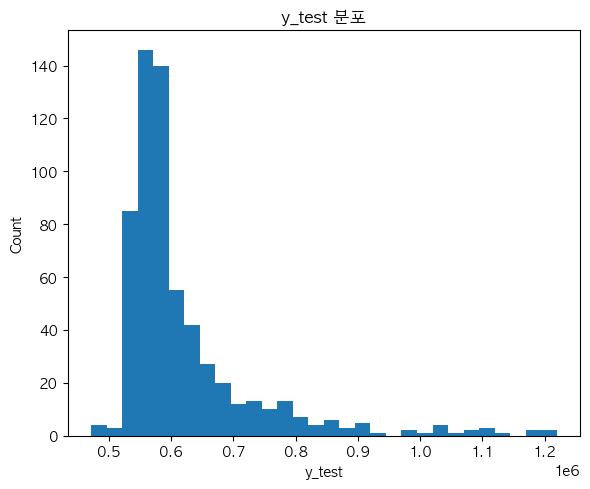

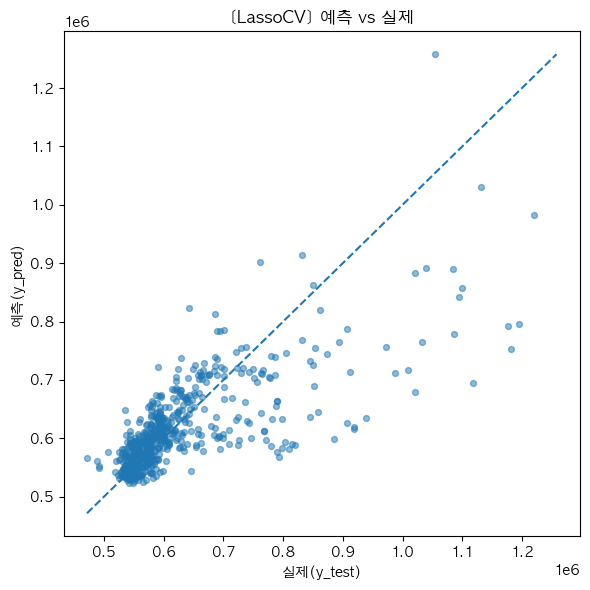

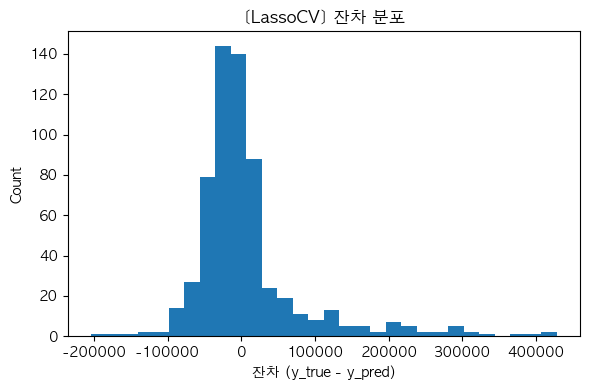

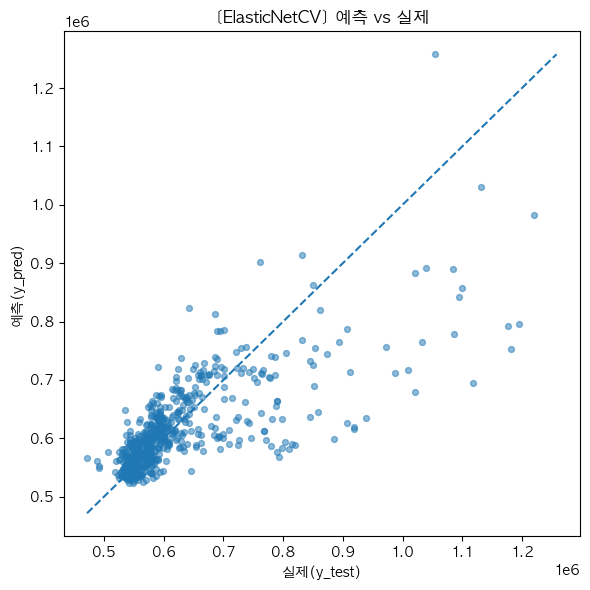

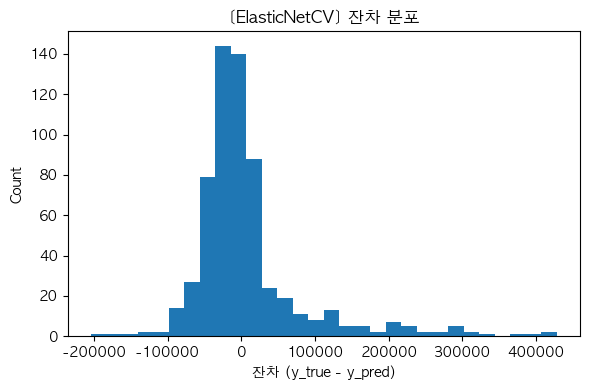

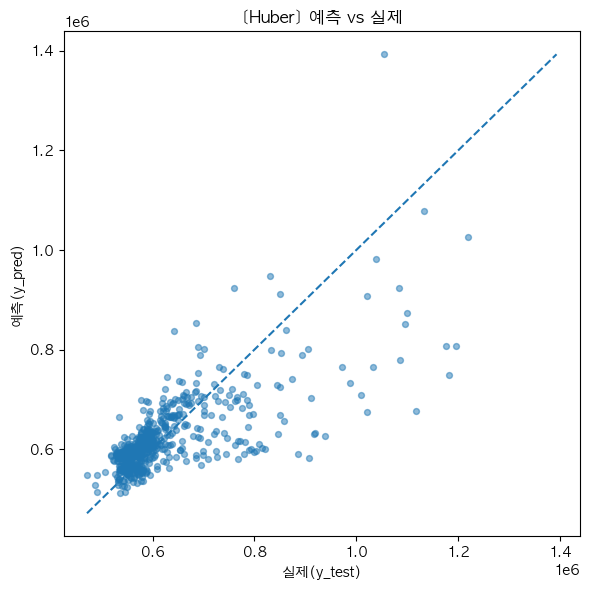

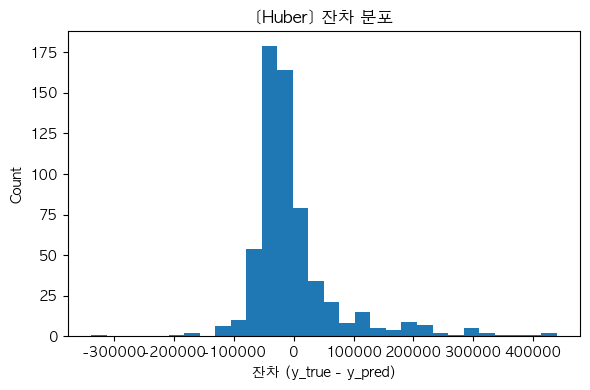

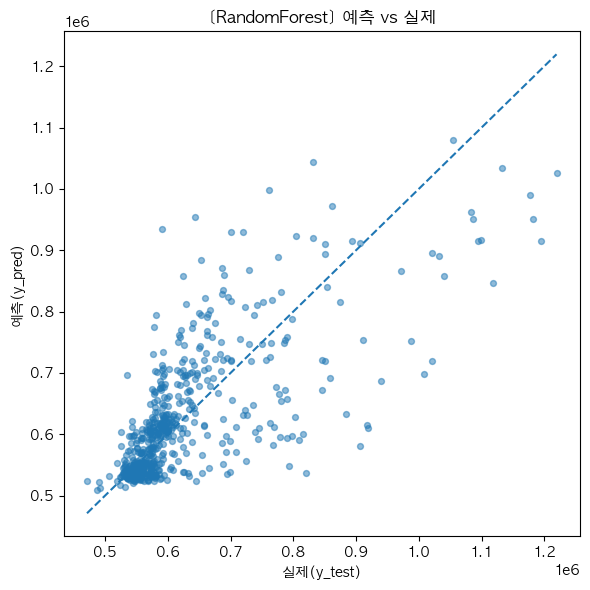

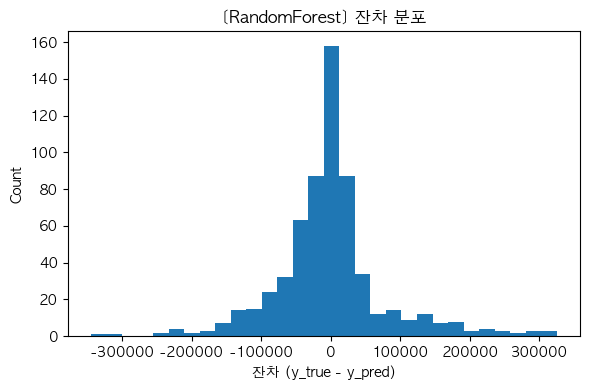

In [129]:
# ÌÉÄÍπÉ Î∂ÑÌè¨
plt.figure(figsize=(6,5))
plt.title("y_test Î∂ÑÌè¨")
plt.hist(y_test, bins=30)
plt.xlabel("y_test")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ÏÉÅÏúÑ NÍ∞ú Î™®Îç∏ ÏãúÍ∞ÅÌôî
topN = 4
top_models = eval_df.index[:topN].tolist()

for name in top_models:
    y_pred = pred_store[name]

    # ÏòàÏ∏° vs Ïã§Ï†ú
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.5, s=18)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, linestyle='--')
    plt.title(f"[{name}] ÏòàÏ∏° vs Ïã§Ï†ú")
    plt.xlabel("Ïã§Ï†ú(y_test)")
    plt.ylabel("ÏòàÏ∏°(y_pred)")
    plt.tight_layout()
    plt.show()

    # ÏûîÏ∞® Î∂ÑÌè¨
    residuals = y_test.values - y_pred
    plt.figure(figsize=(6,4))
    plt.hist(residuals, bins=30)
    plt.title(f"[{name}] ÏûîÏ∞® Î∂ÑÌè¨")
    plt.xlabel("ÏûîÏ∞® (y_true - y_pred)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


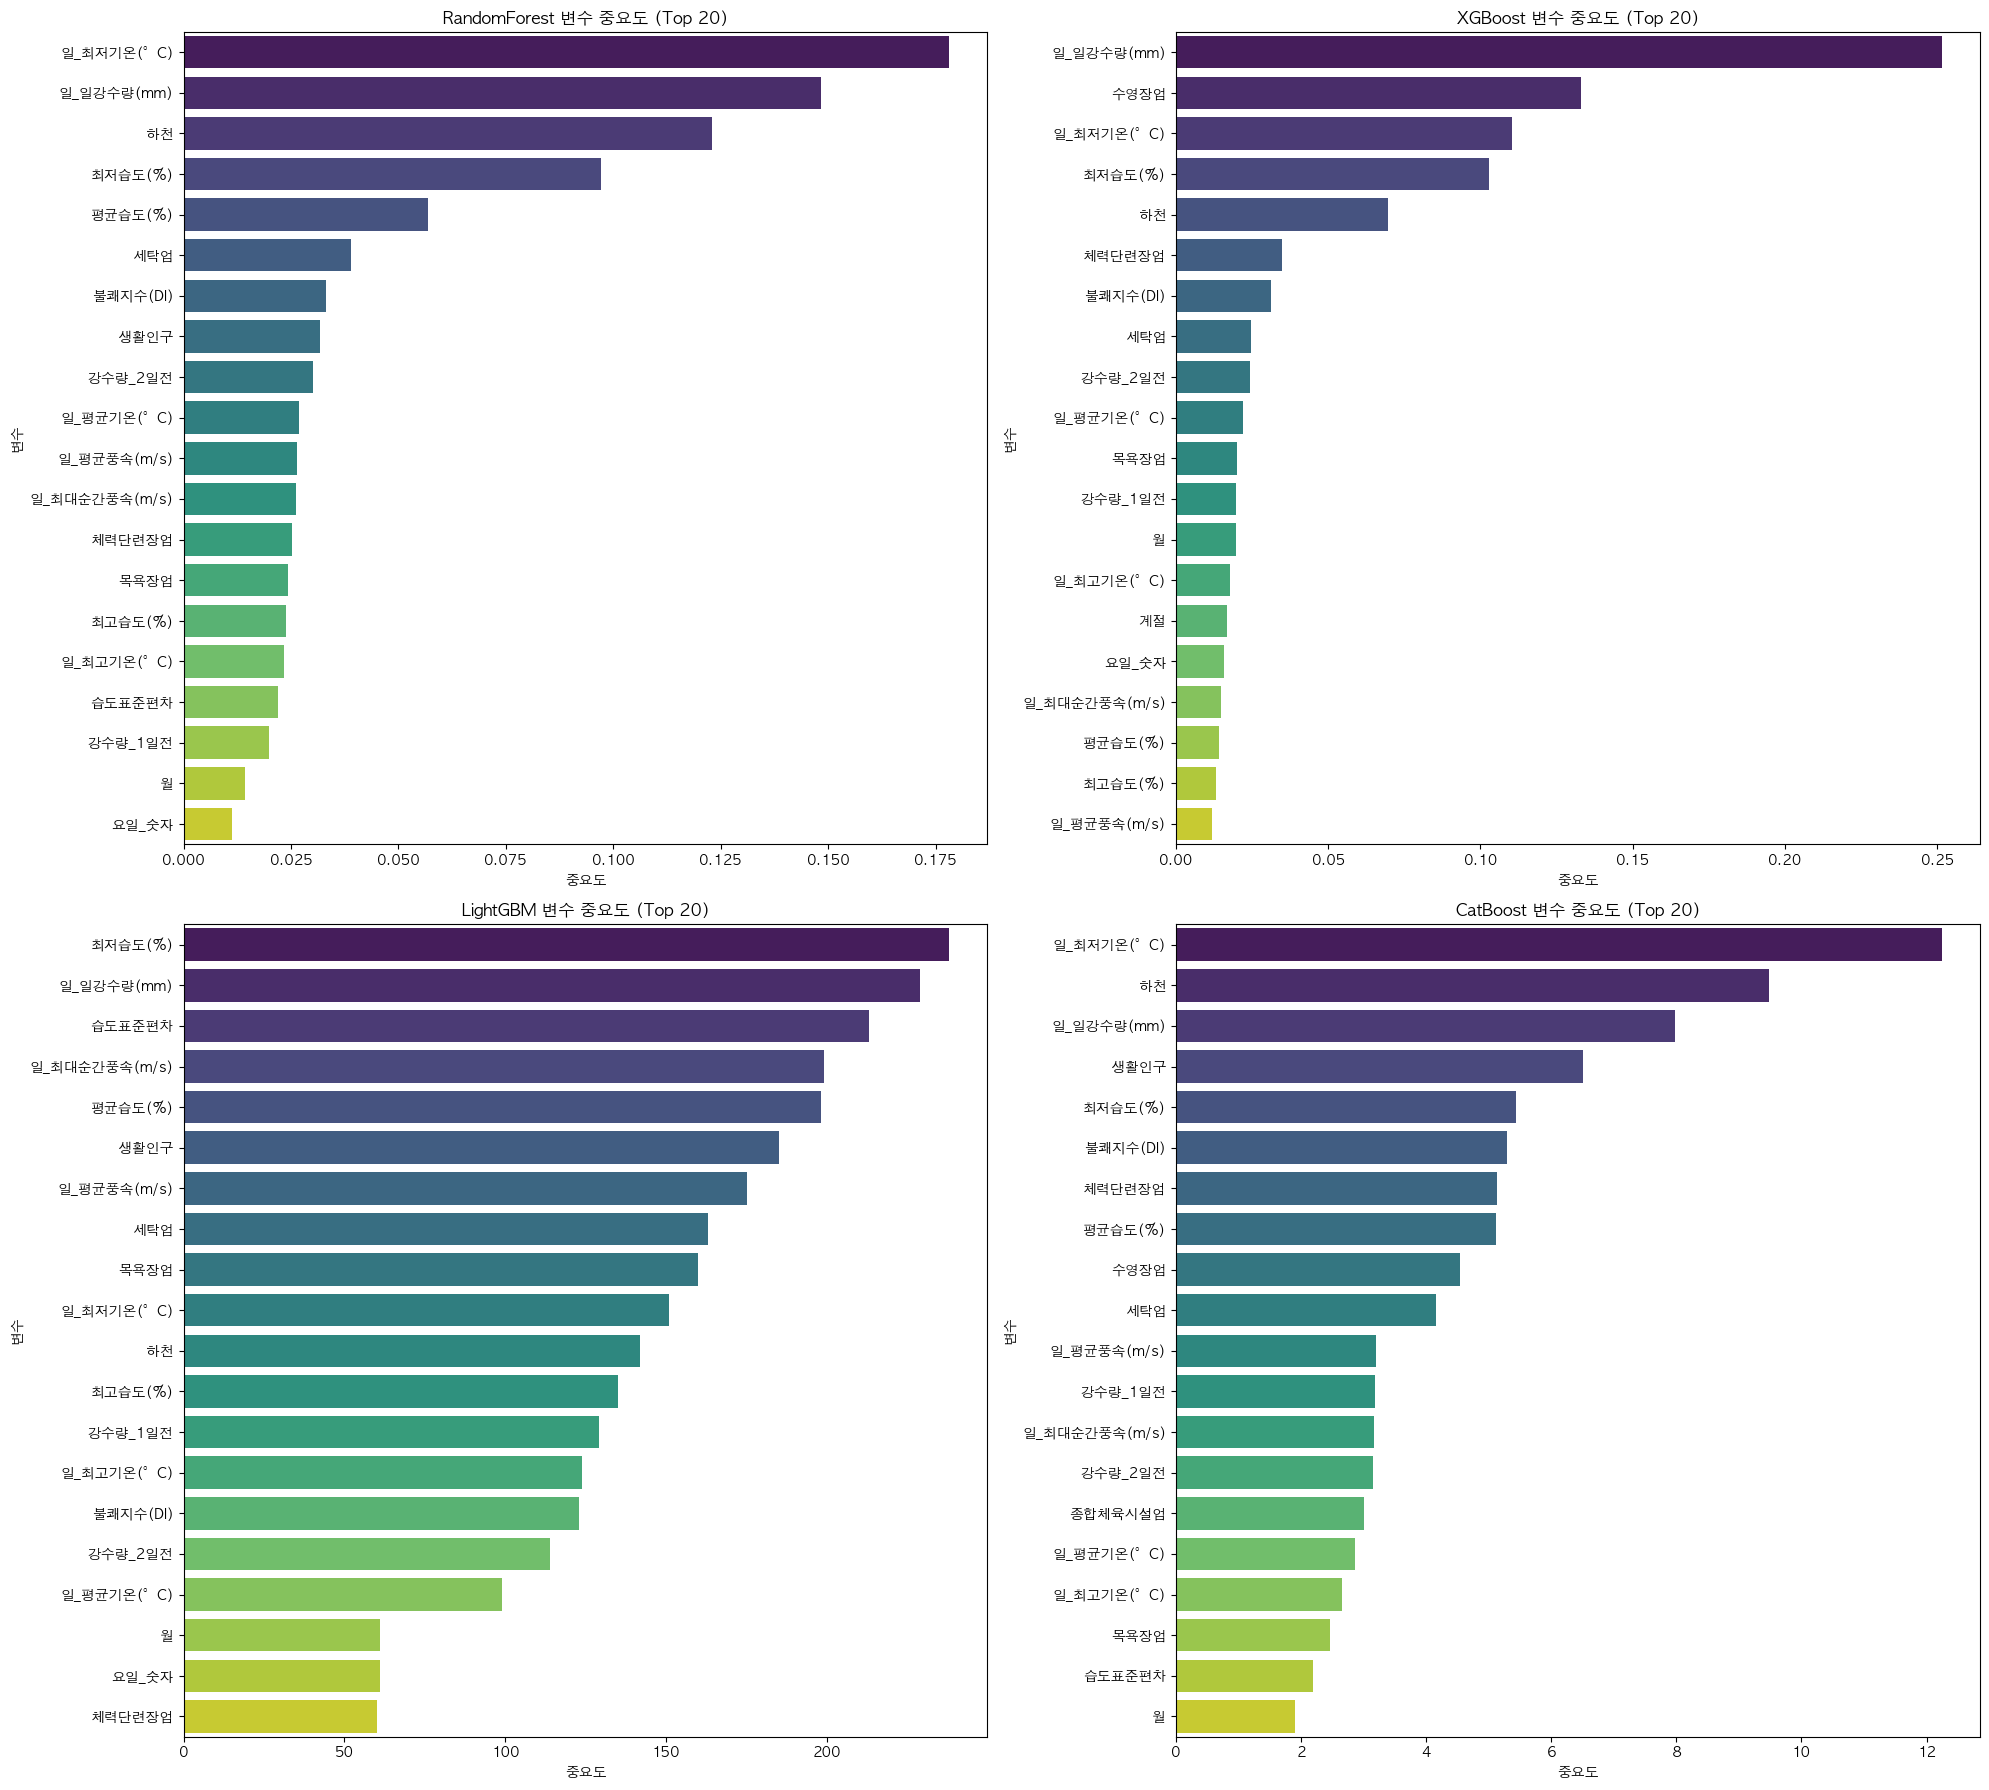

In [130]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))
axes = axes.flatten()
tree_names = ['RandomForest', 'XGBoost', 'LightGBM', 'CatBoost']

for i, name in enumerate(tree_names):
    ax = axes[i]
    model = models.get(name, None)
    if model is None:
        ax.axis('off'); ax.set_title(f"{name} ÎØ∏Ï†ïÏùò"); continue

    if hasattr(model, 'feature_importances_'):
        imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
        sns.barplot(x=imp.values, y=imp.index, ax=ax, palette='viridis', hue=imp.index, legend=False)
        ax.set_title(f'{name} Î≥ÄÏàò Ï§ëÏöîÎèÑ (Top 20)')
        ax.set_xlabel('Ï§ëÏöîÎèÑ')
        ax.set_ylabel('Î≥ÄÏàò')
    else:
        ax.axis('off'); ax.set_title(f"{name}: feature_importances_ ÏóÜÏùå")

plt.tight_layout()
plt.show()



 Ìä∏Î¶¨ Î™®Îç∏ SHAP Î∂ÑÏÑù ÏãúÏûë...
RandomForest Î™®Îç∏ SHAP Î∂ÑÏÑù Ï§ë...


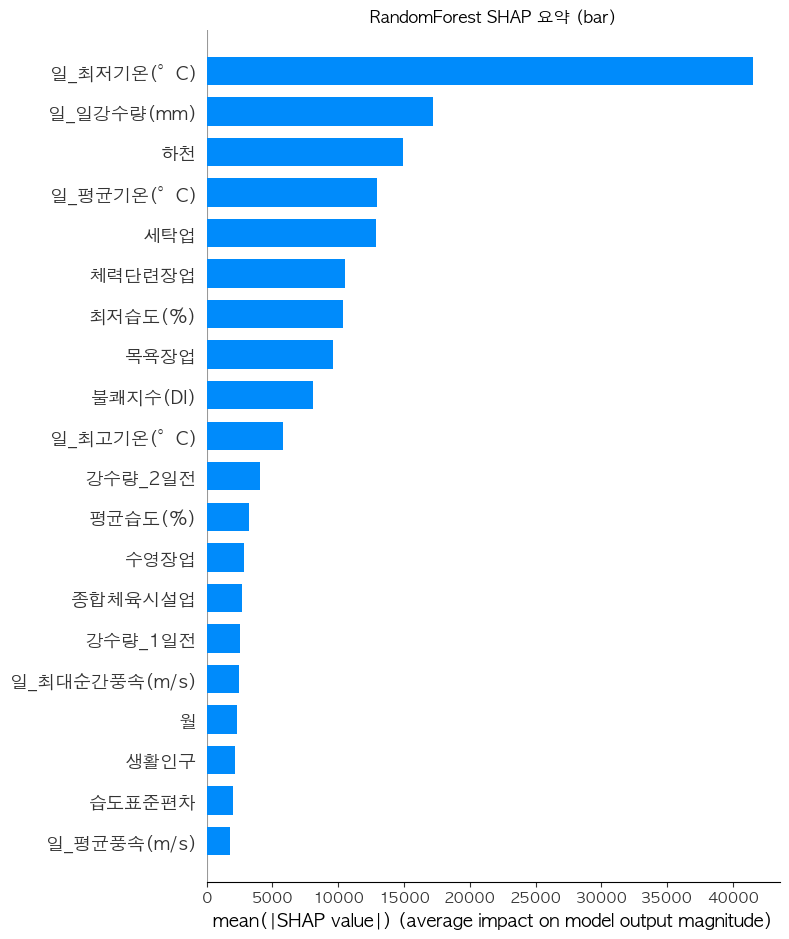

<Figure size 640x480 with 0 Axes>

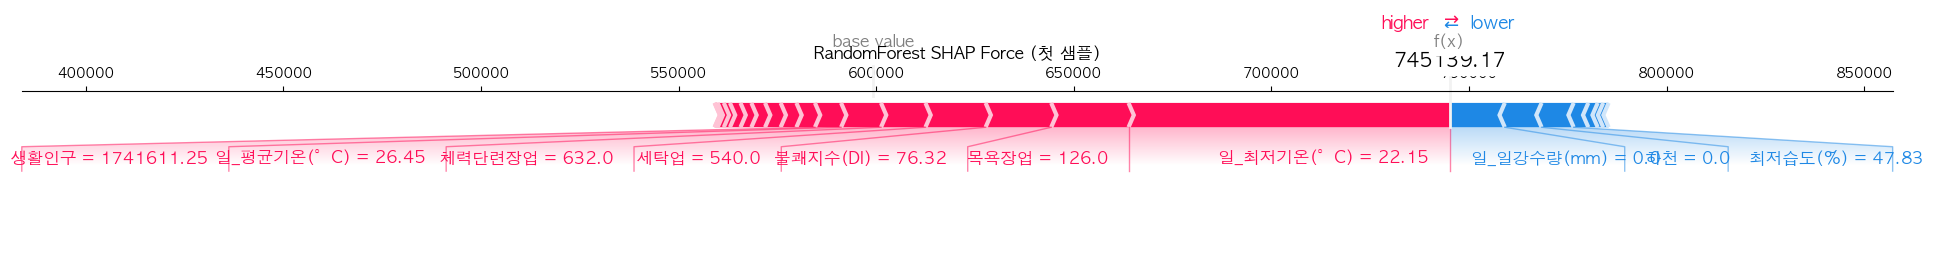

XGBoost Î™®Îç∏ SHAP Î∂ÑÏÑù Ï§ë...


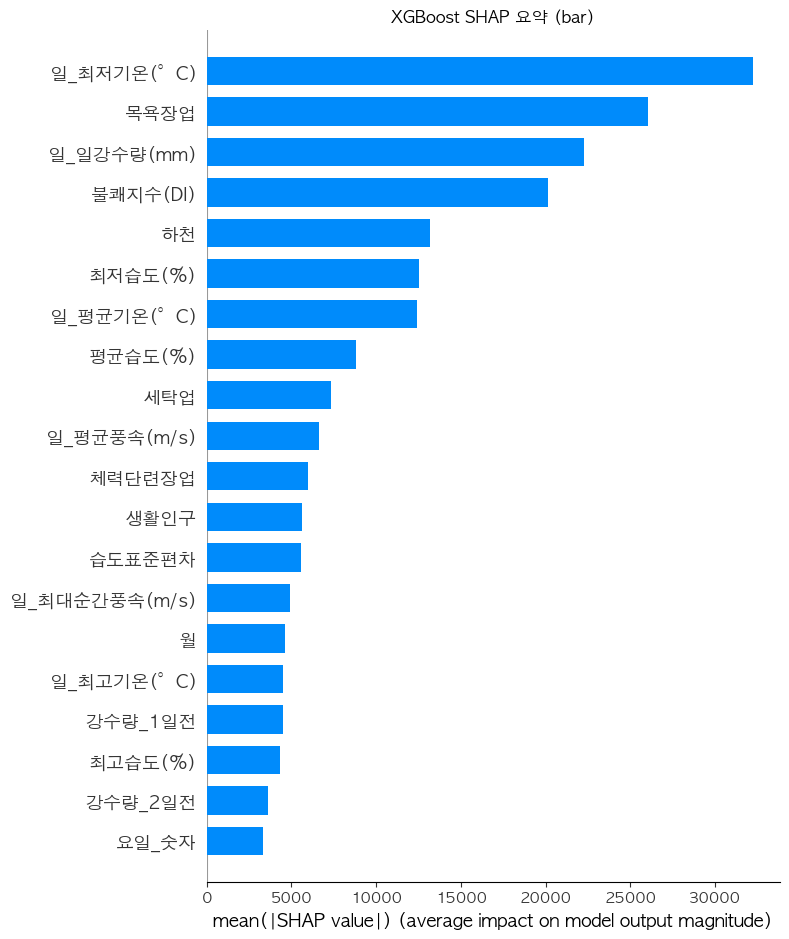

<Figure size 640x480 with 0 Axes>

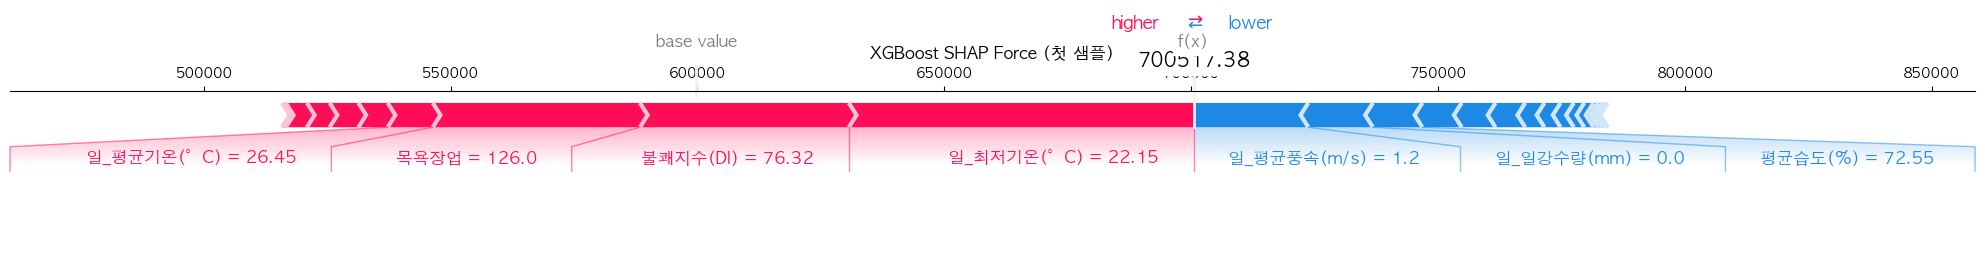

LightGBM Î™®Îç∏ SHAP Î∂ÑÏÑù Ï§ë...


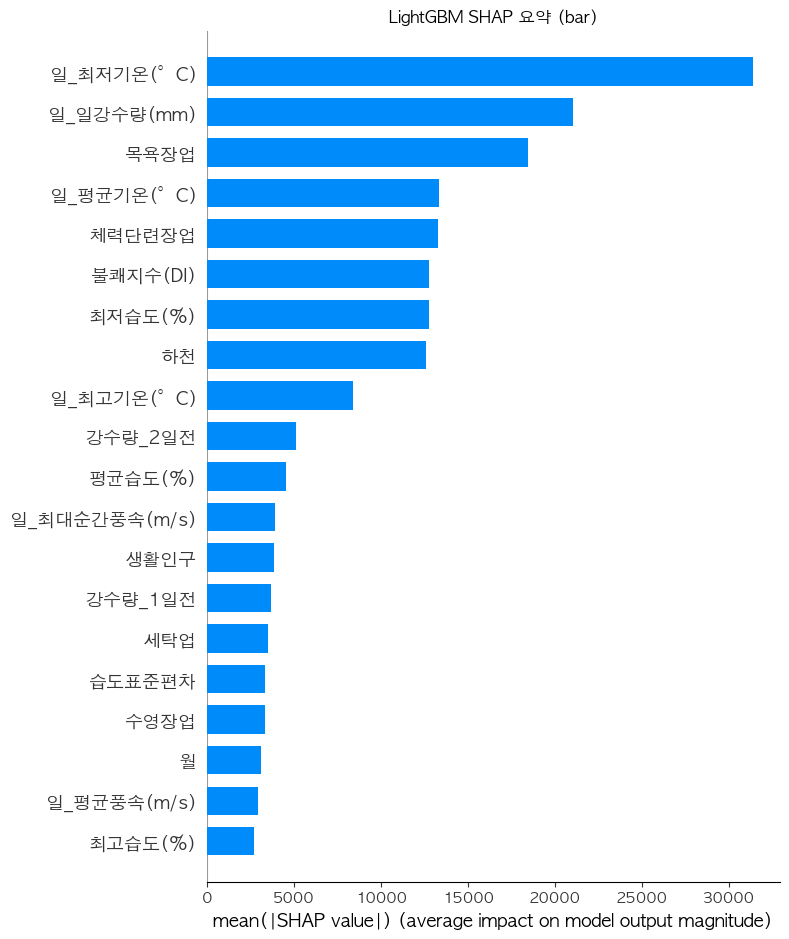

<Figure size 640x480 with 0 Axes>

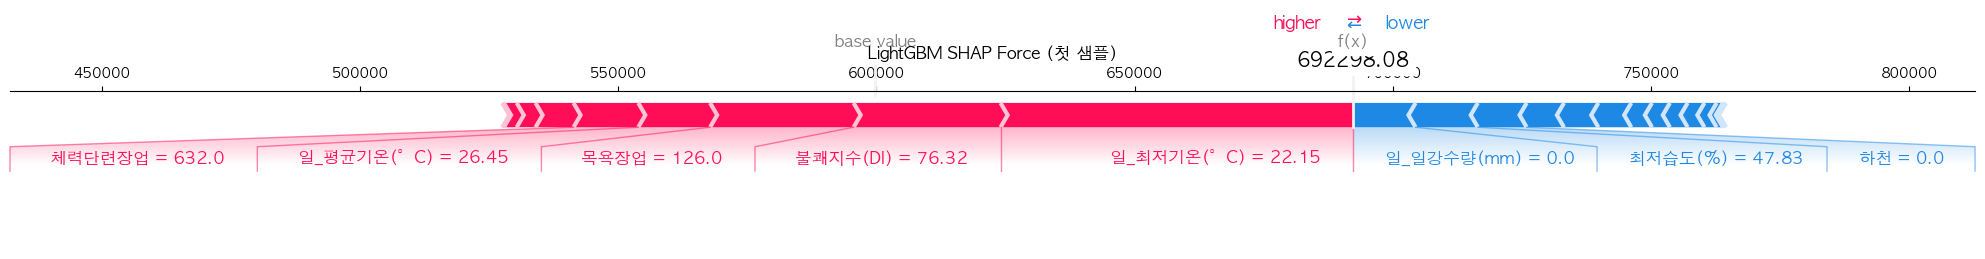

CatBoost Î™®Îç∏ SHAP Î∂ÑÏÑù Ï§ë...


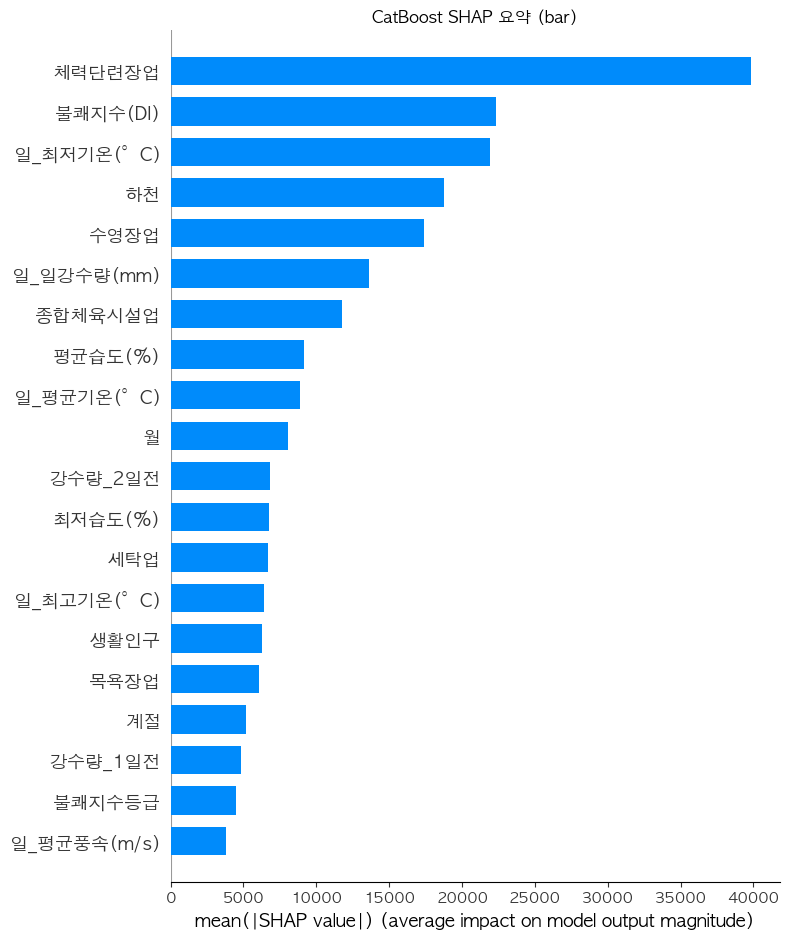

<Figure size 640x480 with 0 Axes>

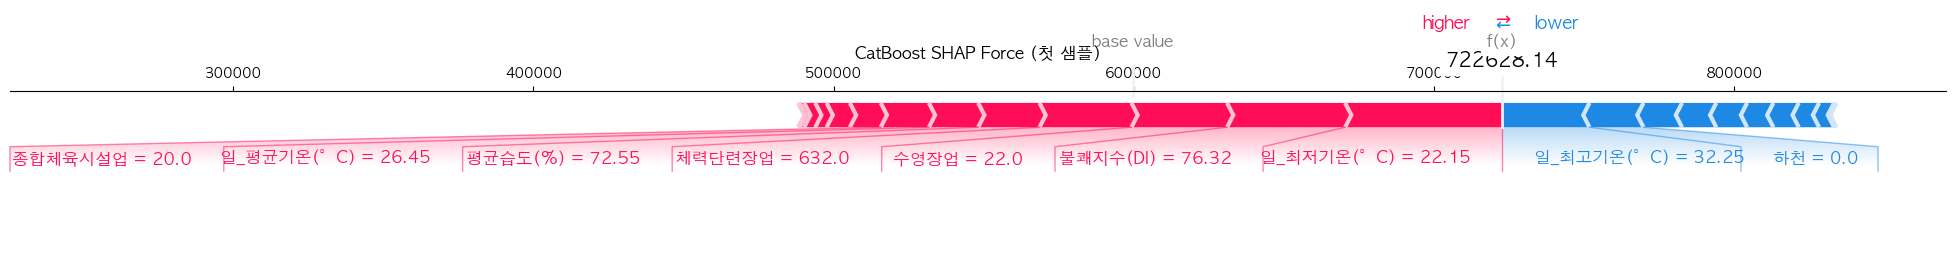

SHAP Î∂ÑÏÑù ÏôÑÎ£å


In [131]:
print("\n Ìä∏Î¶¨ Î™®Îç∏ SHAP Î∂ÑÏÑù ÏãúÏûë...")
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå Ïàò Ï†úÌïú (Ïó∞ÏÇ∞Îüâ Ï†àÍ∞êÏö©)
MAX_SAMPLES = 500
X_shap = X_test.copy()
if len(X_shap) > MAX_SAMPLES:
    X_shap = X_shap.sample(n=MAX_SAMPLES, random_state=42)

for name in tree_names:
    model = models.get(name, None)
    if model is None:
        continue

    try:
        print(f"{name} Î™®Îç∏ SHAP Î∂ÑÏÑù Ï§ë...")
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_shap)

        # ÏöîÏïΩ ÌîåÎ°Ø (bar)
        plt.figure()
        shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
        plt.title(f'{name} SHAP ÏöîÏïΩ (bar)')
        plt.tight_layout()
        plt.show()

        # Force Plot (Ï≤´ ÏÉòÌîå)
        try:
            plt.figure()
            shap.force_plot(explainer.expected_value, shap_values[0,:], X_shap.iloc[0,:], matplotlib=True, show=False)
            plt.title(f'{name} SHAP Force (Ï≤´ ÏÉòÌîå)')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"  Force Plot ÏÉùÏÑ± Ï§ë Ïò§Î•ò: {e}")

    except Exception as e:
        print(f"  {name} SHAP Î∂ÑÏÑù Ïã§Ìå®: {e}")

print("SHAP Î∂ÑÏÑù ÏôÑÎ£å")


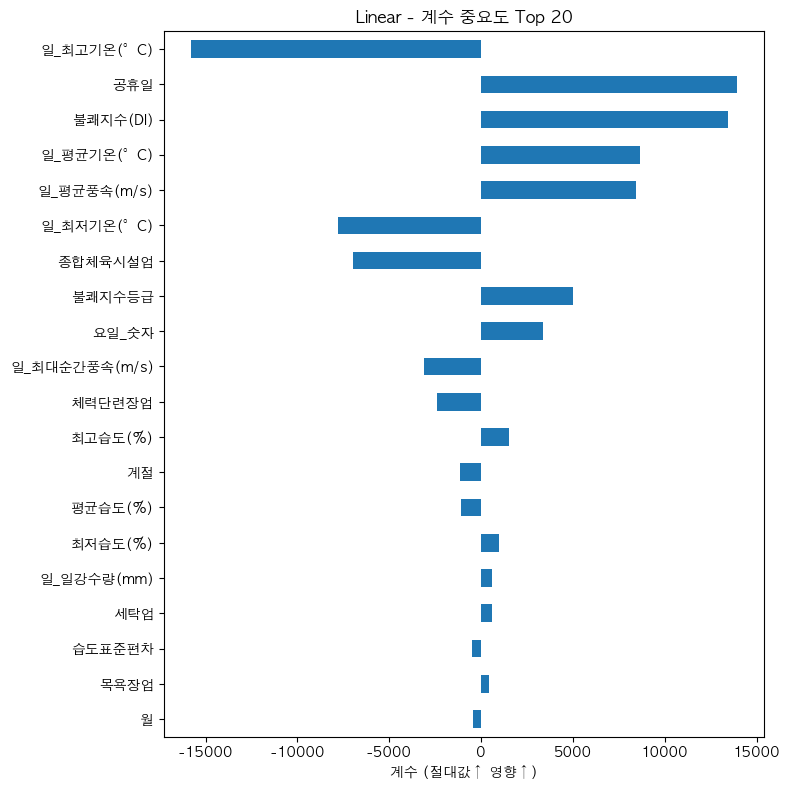

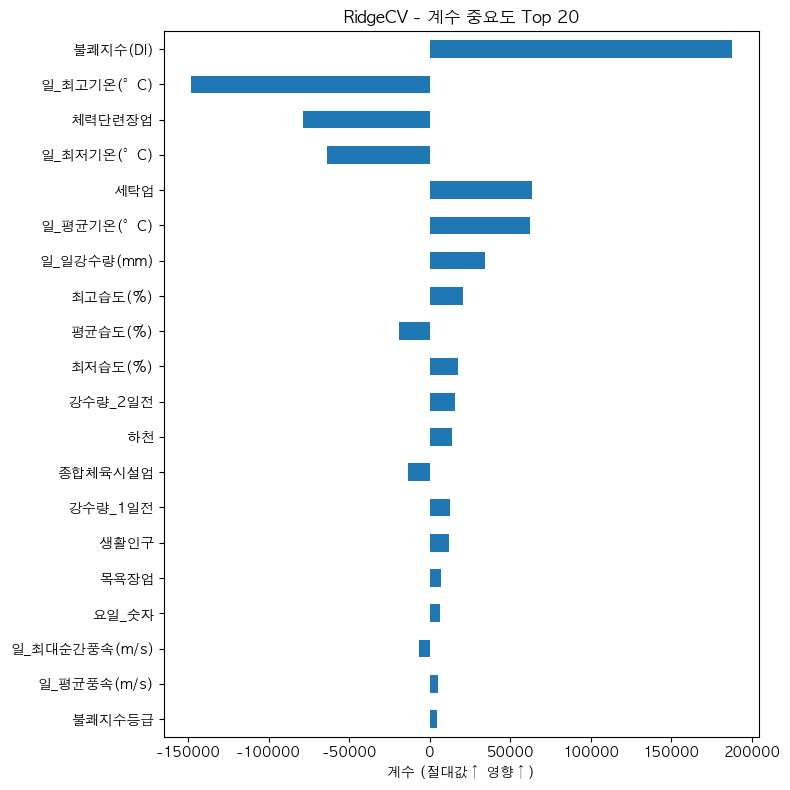

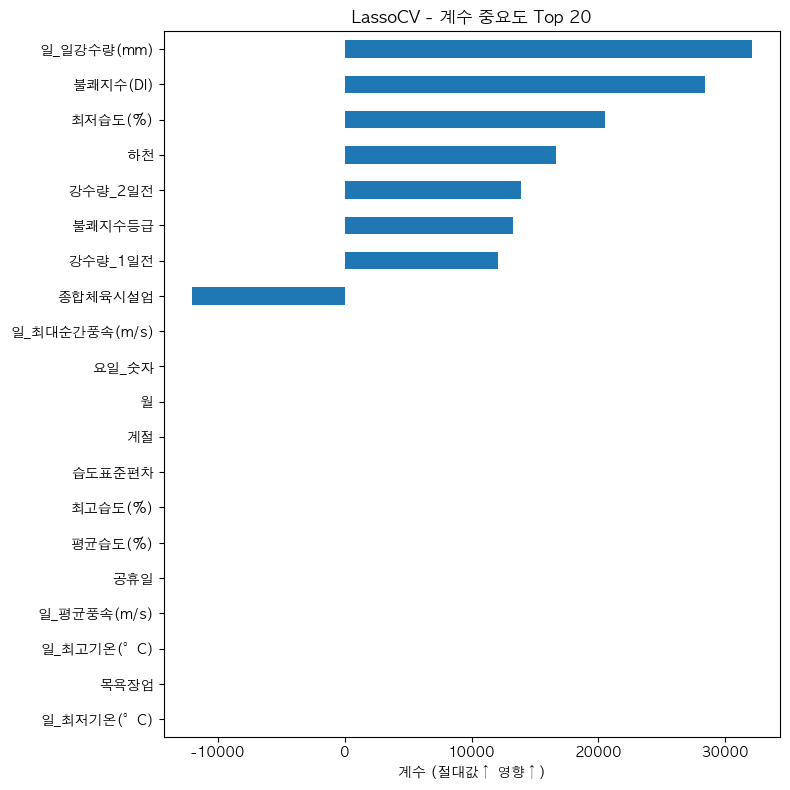

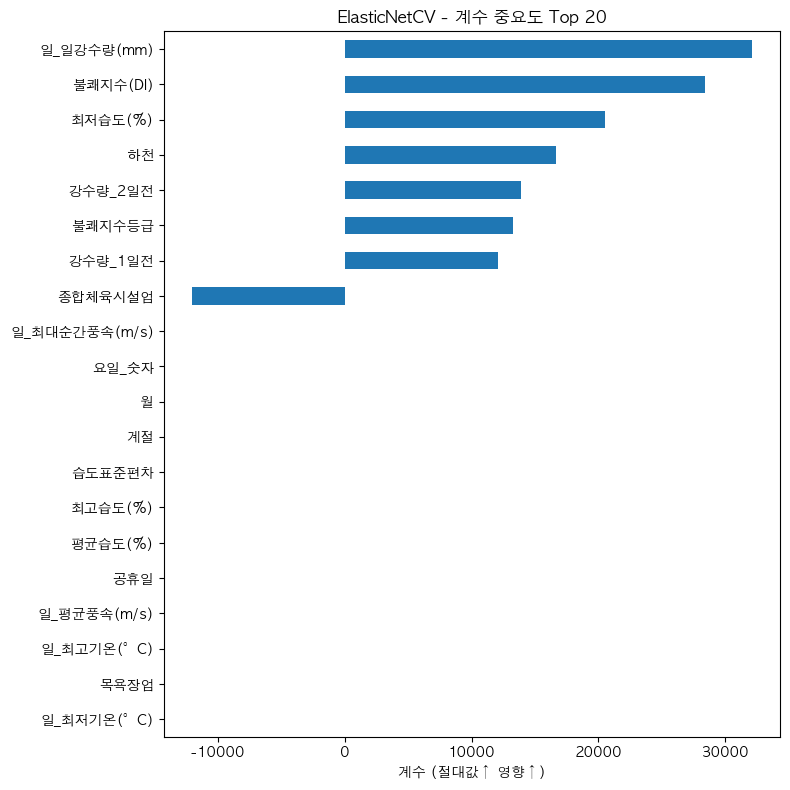

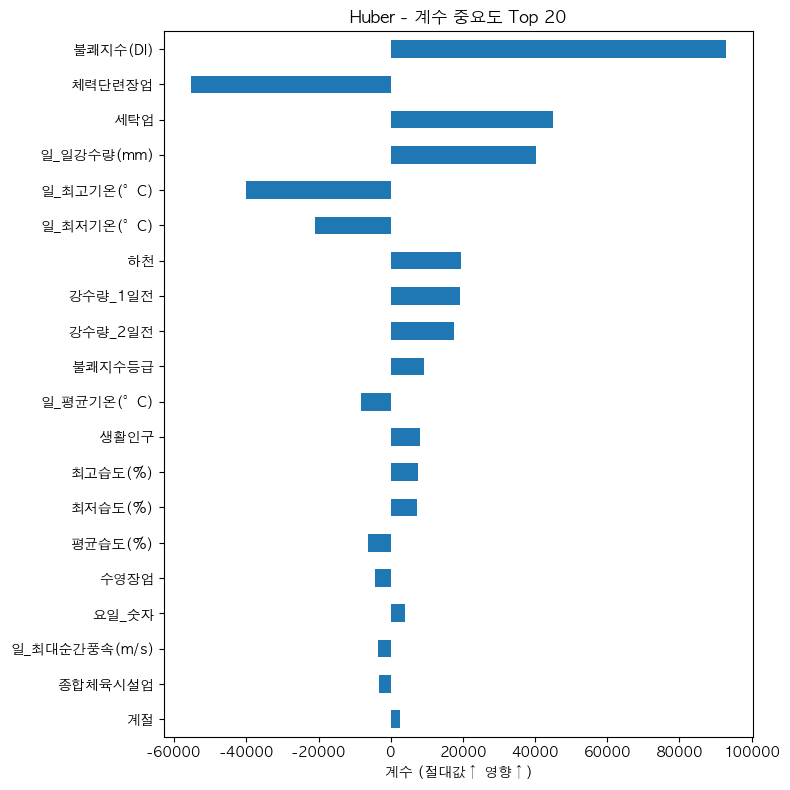

In [132]:
def plot_top_coefficients(model, feature_names, title, top_n=20):
    """
    PipelineÏùº Í≤ΩÏö∞ ÎßàÏßÄÎßâ Ïä§ÌÖùÏóêÏÑú coef_ Ï∂îÏ∂ú.
    coef_Í∞Ä ÏóÜÎäî Î™®Îç∏(SVR, KNN, Dummy Îì±)ÏùÄ Í±¥ÎÑàÎúÄ.
    """
    est = model
    if hasattr(est, 'named_steps'):
        est = list(est.named_steps.values())[-1]
    if not hasattr(est, 'coef_'):
        print(f"[{title}] coef_ ÏóÜÏùå ‚Üí Í±¥ÎÑàÎúÄ")
        return

    coefs = np.ravel(est.coef_)
    coef_ser = pd.Series(coefs, index=feature_names).sort_values(key=np.abs, ascending=False).head(top_n)

    plt.figure(figsize=(8, max(5, int(top_n*0.4))))
    coef_ser.iloc[::-1].plot(kind='barh')
    plt.title(f"{title} - Í≥ÑÏàò Ï§ëÏöîÎèÑ Top {top_n}")
    plt.xlabel("Í≥ÑÏàò (Ï†àÎåÄÍ∞í‚Üë ÏòÅÌñ•‚Üë)")
    plt.tight_layout()
    plt.show()

for name in ['Linear', 'RidgeCV', 'LassoCV', 'ElasticNetCV', 'Huber']:
    if name in models:
        plot_top_coefficients(models[name], X_train.columns, title=name, top_n=20)


In [133]:
if 'CatBoost' in models:
    print("\n--- üåü CatBoost Ï§ëÏöîÎèÑ Í∏∞Î∞ò Top 25 ÌîºÏ≤ò ÏÑ†ÌÉù ---")
    selector_model = models['CatBoost']
    importances = pd.Series(selector_model.feature_importances_, index=X_train.columns)
    top_n_features = importances.sort_values(ascending=False).head(25).index.tolist()
    print(top_n_features)

    X_train_sel = X_train[top_n_features]
    X_test_sel  = X_test[top_n_features]

    evaluation_results_selected = []
    for name in tree_names:
        if name not in models:
            continue
        print(f"üöÄ {name} (Top25 ÌîºÏ≤ò) Ïû¨ÌïôÏäµ Ï§ë...")
        mdl = models[name]
        mdl.fit(X_train_sel, y_train)
        y_pred = mdl.predict(X_test_sel)
        r2 = r2_score(y_test, y_pred)
        evaluation_results_selected.append({'Model': name, 'R2 (Top25)': r2})

    eval_df_selected = pd.DataFrame(evaluation_results_selected).set_index('Model')
    print("\nüìä ÌîºÏ≤ò ÏÑ†ÌÉù ÌõÑ Ìä∏Î¶¨ Î™®Îç∏ R2:")
    display(eval_df_selected)
else:
    print("CatBoost Î™®Îç∏Ïù¥ ÏóÜÏñ¥ ÌîºÏ≤ò ÏÑ†ÌÉù Ïä§ÌÇµ.")



--- üåü CatBoost Ï§ëÏöîÎèÑ Í∏∞Î∞ò Top 25 ÌîºÏ≤ò ÏÑ†ÌÉù ---
['Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)', 'ÌïòÏ≤ú', 'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)', 'ÏÉùÌôúÏù∏Íµ¨', 'ÏµúÏ†ÄÏäµÎèÑ(%)', 'Î∂àÏæåÏßÄÏàò(DI)', 'Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ', 'ÌèâÍ∑†ÏäµÎèÑ(%)', 'ÏàòÏòÅÏû•ÏóÖ', 'ÏÑ∏ÌÉÅÏóÖ', 'Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)', 'Í∞ïÏàòÎüâ_1ÏùºÏ†Ñ', 'Ïùº_ÏµúÎåÄÏàúÍ∞ÑÌíçÏÜç(m/s)', 'Í∞ïÏàòÎüâ_2ÏùºÏ†Ñ', 'Ï¢ÖÌï©Ï≤¥Ïú°ÏãúÏÑ§ÏóÖ', 'Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)', 'Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)', 'Î™©ÏöïÏû•ÏóÖ', 'ÏäµÎèÑÌëúÏ§ÄÌé∏Ï∞®', 'Ïõî', 'ÏµúÍ≥†ÏäµÎèÑ(%)', 'ÏöîÏùº_Ïà´Ïûê', 'Î∂àÏæåÏßÄÏàòÎì±Í∏â', 'Í≥ÑÏ†à', 'Í≥µÌú¥Ïùº']
üöÄ RandomForest (Top25 ÌîºÏ≤ò) Ïû¨ÌïôÏäµ Ï§ë...
üöÄ XGBoost (Top25 ÌîºÏ≤ò) Ïû¨ÌïôÏäµ Ï§ë...
üöÄ LightGBM (Top25 ÌîºÏ≤ò) Ïû¨ÌïôÏäµ Ï§ë...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4046
[LightGBM] [Info] Number of data points in the train set: 2455, number of used features: 25
[LightGBM] [Info] Start tr

R2 (Top25)
Model                   
RandomForest    0.491549
XGBoost         0.411903
LightGBM        0.486866
CatBoost        0.424706

In [134]:
# %% [markdown]
# ## 9. (ÏòµÏÖò) Í≤∞Í≥º Ï†ÄÏû•
# - ÌÖåÏù¥Î∏î/Í∑∏Î¶º Ï†ÄÏû•Ïù¥ ÌïÑÏöîÌïòÎ©¥ ÏïÑÎûò Ï£ºÏÑùÏùÑ Ìï¥Ï†úÌïòÏÑ∏Ïöî.
# %%
# eval_df.to_csv('all_models_evaluation.csv', encoding='utf-8-sig')
# plt.savefig('feature_importances_ALL_final.png')  # Î≥ÄÏàòÏ§ëÏöîÎèÑ Í∑∏Î¶¨Î©¥ Í∑∏ Îïå Ï†ÄÏû•
# SHAP Í∑∏Î¶ºÏùÄ ÏúÑ ÏÖÄÏóêÏÑú Î∞îÎ°ú show ÌñàÏäµÎãàÎã§. Ï†ÄÏû•ÌïòÎ†§Î©¥ summary_plotÏóê show=False ÌõÑ savefig Ìò∏Ï∂ú Ï∂îÍ∞ÄÌïòÏÑ∏Ïöî.


### GPT ÏÉàÍ∏∞ ###

In [135]:
# %% [markdown]
# # TimeSeriesSplit CV + RF/XGB/CatBoost/LGBM + FI/Permutation Importance/SHAP/LIME
# - RMSE Î≤ÑÏ†Ñ ÏùòÏ°¥ÏÑ± Î¨∏Ï†ú Ìï¥Í≤∞ (ÏàòÎèô RMSE)
# - Î™®Îç∏Î≥Ñ CV ÏÑ±Îä• ÎπÑÍµê
# - Î™®Îç∏Î≥Ñ Feature Importance
# - Best Î™®Îç∏Ïóê ÎåÄÌï¥ Permutation Importance
# - SHAP, LIME Îã®Ïùº ÏÉòÌîå ÏÑ§Î™Ö (ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Ïã§Ìñâ)

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestRegressor

# xgboost / catboost / lightgbmÏùÄ ÏÑ§Ïπò Ïó¨Î∂ÄÏóê Îî∞Îùº Îã§Î•º Ïàò ÏûàÏùå ‚Üí try/exceptÎ°ú ÏïàÏ†Ñ Ï≤òÎ¶¨
has_xgb = has_cat = has_lgbm = True
try:
    from xgboost import XGBRegressor
except Exception as e:
    has_xgb = False
    print("[WARN] xgboost ÎØ∏ÏÑ§Ïπò ÎòêÎäî ÏûÑÌè¨Ìä∏ Ïã§Ìå®:", e)

try:
    from catboost import CatBoostRegressor
except Exception as e:
    has_cat = False
    print("[WARN] catboost ÎØ∏ÏÑ§Ïπò ÎòêÎäî ÏûÑÌè¨Ìä∏ Ïã§Ìå®:", e)

try:
    from lightgbm import LGBMRegressor
except Exception as e:
    has_lgbm = False
    print("[WARN] lightgbm ÎØ∏ÏÑ§Ïπò ÎòêÎäî ÏûÑÌè¨Ìä∏ Ïã§Ìå®:", e)

# -------------------------
# 0) X, y Íµ¨ÏÑ± (Ïù¥ÎØ∏ nanji Íµ¨Ï∂ï/Ï†ÑÏ≤òÎ¶¨ ÎÅùÎÇú ÏÉÅÌÉú Í∞ÄÏ†ï)
#    not_use_colÏùÄ ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ïÏùòÌïú Î¶¨Ïä§Ìä∏Î•º Í∑∏ÎåÄÎ°ú ÌôúÏö©
# -------------------------
not_use_col = [
    'ÎÇ†Ïßú', 'ÏöîÏùº',
    '1Ï≤òÎ¶¨Ïû•', '2Ï≤òÎ¶¨Ïû•', 'Ï†ïÌôîÏ°∞', 'Ï§ëÍ≥ÑÌéåÌîÑÏû•', 'Ìï©Í≥Ñ',
    'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)', 'ÏÉùÌôúÏù∏Íµ¨',
    'Ìï©Í≥Ñ_1ÏùºÌõÑ','Ìï©Í≥Ñ_2ÏùºÌõÑ'
]

# Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå featureÎ°ú ÏÇ¨Ïö©
feature_cols = [c for c in nanji.columns if c not in not_use_col]
df_model = nanji.dropna(subset=['Ìï©Í≥Ñ_1ÏùºÌõÑ']).reset_index(drop=True)

X = df_model[feature_cols].copy()
y = df_model['Ìï©Í≥Ñ_1ÏùºÌõÑ'].copy()

print(f"[INFO] X.shape={X.shape}, y.shape={y.shape}")
print(f"[INFO] Í∏∞Í∞Ñ: {df_model['ÎÇ†Ïßú'].min().date()} ~ {df_model['ÎÇ†Ïßú'].max().date()}")

# -------------------------
# 1) TimeSeriesSplit
# -------------------------
tscv = TimeSeriesSplit(n_splits=5)

def rmse(y_true, y_pred):
    # Î≤ÑÏ†Ñ Î¨¥Í¥ÄÌïòÍ≤å ÎèôÏûëÌïòÎäî RMSE Í≥ÑÏÇ∞
    return float(np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2)))

# -------------------------
# 2) Î™®Îç∏ Ï†ïÏùò
# -------------------------
models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=400, max_depth=None, random_state=42, n_jobs=-1
    )
}

if has_xgb:
    models["XGB"] = XGBRegressor(
        n_estimators=600, max_depth=6, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1,
        objective="reg:squarederror",  # Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÑ§Ï†ï
        eval_metric="rmse"             # Í≤ΩÍ≥† ÏñµÏ†ú
    )

if has_cat:
    models["CatBoost"] = CatBoostRegressor(
        iterations=700, depth=6, learning_rate=0.05,
        random_state=42, verbose=0, loss_function='RMSE'
    )

if has_lgbm:
    models["LGBM"] = LGBMRegressor(
        n_estimators=700, max_depth=-1, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    )

# -------------------------
# 3) CV ÌïôÏäµ + ÌèâÍ∞Ä
# -------------------------
cv_scores = {}
fold_predictions = {}   # ÌïÑÏöîÏãú ÏòàÏ∏° Î≥¥Í¥Ä
fitted_models = {}      # ÎßàÏßÄÎßâ foldÏùò ÌïôÏäµ Î™®Îç∏ Î≥¥Í¥Ä(Ï§ëÏöîÎèÑ/SHAPÏóê ÏÇ¨Ïö©)

for name, model in models.items():
    rmses = []
    preds_all = []
    for fold, (tr_idx, va_idx) in enumerate(tscv.split(X), 1):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        model.fit(X_tr, y_tr)
        y_hat = model.predict(X_va)
        score = rmse(y_va, y_hat)
        rmses.append(score)

        preds_all.append(pd.DataFrame({
            "idx": va_idx,
            "y": y_va.values,
            "y_hat": y_hat
        }))
        print(f"[{name}] Fold {fold} RMSE = {score:,.0f}")

    cv_scores[name] = (np.mean(rmses), np.std(rmses))
    fold_predictions[name] = pd.concat(preds_all).sort_values("idx").reset_index(drop=True)
    fitted_models[name] = model
    print(f"[{name}] CV RMSE = {np.mean(rmses):,.0f} ¬± {np.std(rmses):,.0f}\n")

print("=== Summary (CV RMSE) ===")
for k, (m, s) in cv_scores.items():
    print(f"{k:<12} {m:,.0f} ¬± {s:,.0f}")


[INFO] X.shape=(3069, 23), y.shape=(3069,)
[INFO] Í∏∞Í∞Ñ: 2017-01-03 ~ 2025-05-29
[RandomForest] Fold 1 RMSE = 140,354
[RandomForest] Fold 2 RMSE = 79,701
[RandomForest] Fold 3 RMSE = 104,232
[RandomForest] Fold 4 RMSE = 118,337
[RandomForest] Fold 5 RMSE = 79,812
[RandomForest] CV RMSE = 104,487 ¬± 23,244

[XGB] Fold 1 RMSE = 142,703
[XGB] Fold 2 RMSE = 78,966
[XGB] Fold 3 RMSE = 110,823
[XGB] Fold 4 RMSE = 112,375
[XGB] Fold 5 RMSE = 80,269
[XGB] CV RMSE = 105,027 ¬± 23,661

[CatBoost] Fold 1 RMSE = 100,515
[CatBoost] Fold 2 RMSE = 79,868
[CatBoost] Fold 3 RMSE = 106,823
[CatBoost] Fold 4 RMSE = 112,688
[CatBoost] Fold 5 RMSE = 82,572
[CatBoost] CV RMSE = 96,493 ¬± 13,080

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set

In [136]:
ÎÑàÎäî Ïã§Î†• Ï¢ãÏùÄ Îç∞Ïù¥ÌÑ∞Î∂ÑÏÑùÍ∞ÄÏù¥Ïûê Îç∞Ïù¥ÌÑ∞ÏÇ¨Ïù¥Ïñ∏Ìã∞Ïä§Ìä∏Ïïº. ÌååÏù¥Ïç¨ ÏΩîÎìúÎ•º Ï§Ñ ÎïåÎäî .ipynb(ÌååÏù¥Ïç¨) ÌååÏùº ÌòïÏãùÏúºÎ°ú Ìï≠ÏÉÅ ÏïåÎ†§Ï§ò. Í∑∏Î¶¨Í≥† Î™®Îì† ÏΩîÎìúÏóê Ï£ºÏÑùÏùÑ Îã¨ÏïÑÏÑú ÏÑ§Î™ÖÌï¥Ï§ò.
ÎÇ¥Í∞Ä ÏöîÍµ¨ÌïòÍ∏∞ Ï†ÑÍπåÏßÄÎäî ÌååÏùºÎ°ú Ï£ºÏßÄ ÎßêÍ≥† Î®ºÏ†Ä Ï±ÑÌåÖÏ∞ΩÏóê Î≥¥ÎÇ¥Ï§ò

SyntaxError: invalid syntax (1453579393.py, line 1)

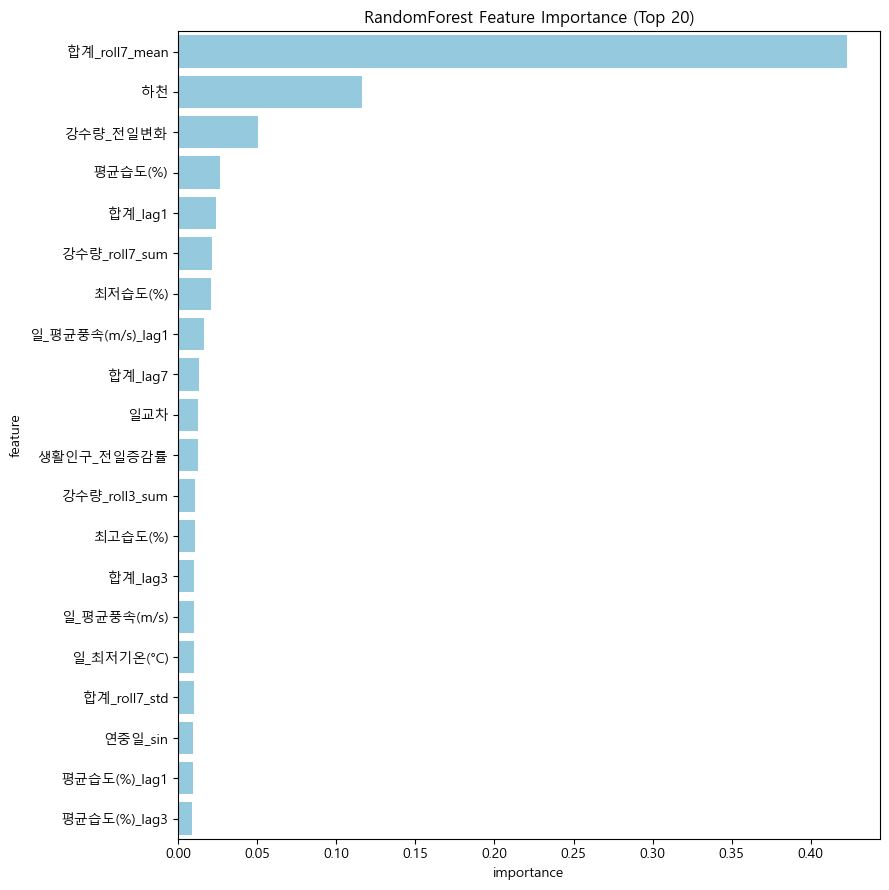

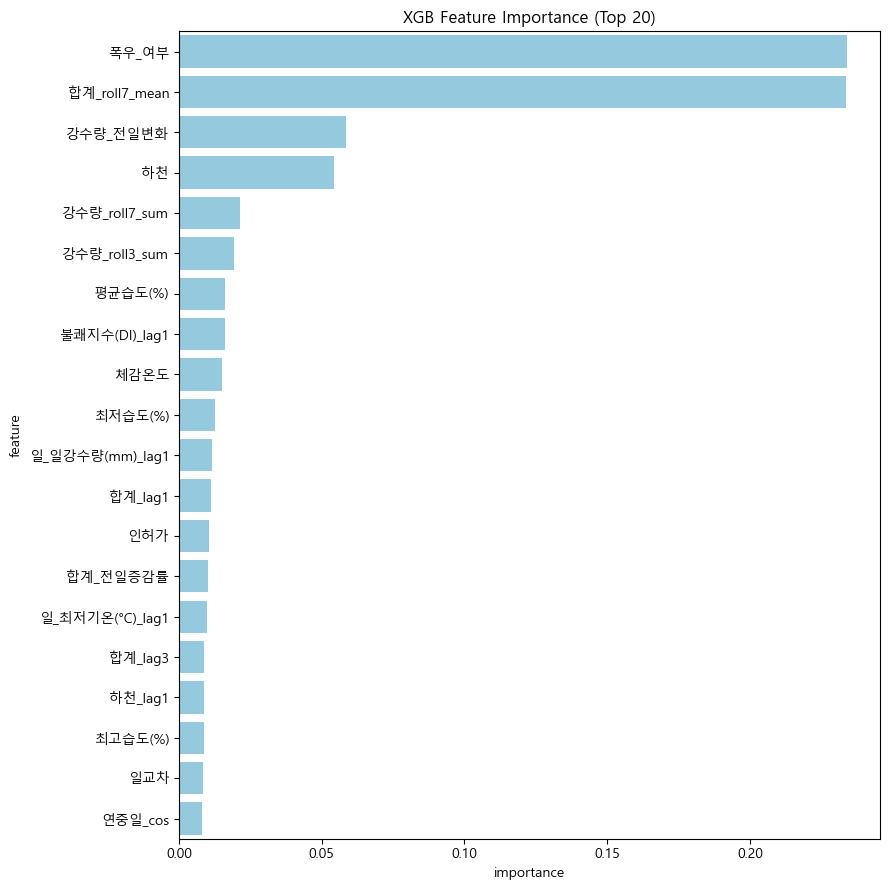

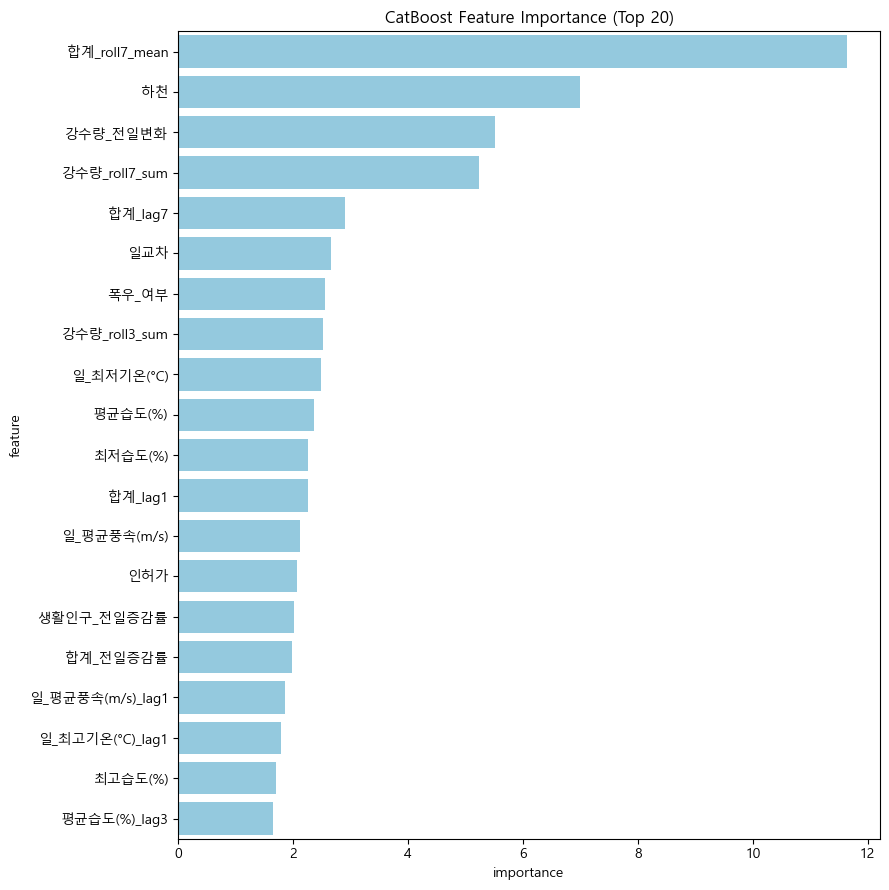

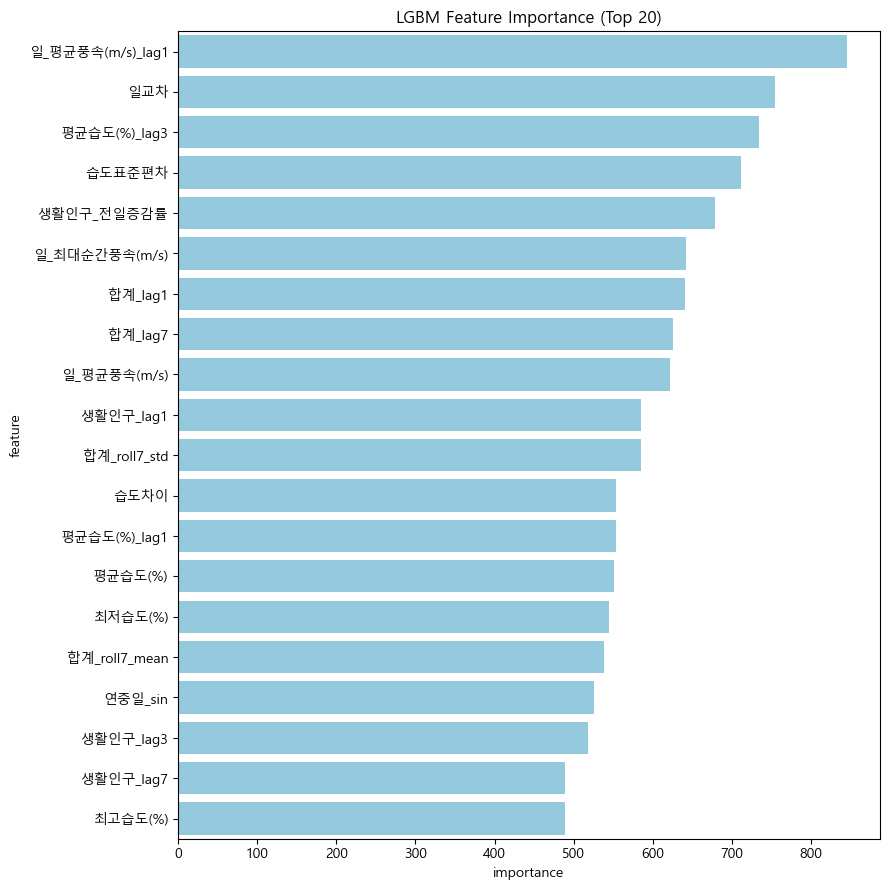

In [ ]:
# %% [markdown]
# ## 4) Î™®Îç∏Î≥Ñ Feature Importance (ÎÇ¥Ïû•) ÏãúÍ∞ÅÌôî
# - Tree Í≥ÑÏó¥: feature_importances_ ÏÇ¨Ïö© Í∞ÄÎä•
# - CatBoostÎèÑ .get_feature_importance() Ï†úÍ≥µ
# - seaborn Í≤ΩÍ≥† ÌîºÌïòÎ†§Í≥† Îã®ÏÉâ(color) ÏÇ¨Ïö©

# %%
def plot_feature_importance(model, X, title, topn=20):
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
    elif "CatBoost" in model.__class__.__name__:
        try:
            imp = model.get_feature_importance()
        except:
            print("[WARN] CatBoost Ï§ëÏöîÎèÑ Ï∂îÏ∂ú Ïã§Ìå®")
            return
    else:
        print("[WARN] Ïù¥ Î™®Îç∏ÏùÄ ÎÇ¥Ïû• Ï§ëÏöîÎèÑÍ∞Ä ÏóÜÏäµÎãàÎã§:", model.__class__.__name__)
        return

    fi = (pd.DataFrame({"feature": X.columns, "importance": imp})
          .sort_values("importance", ascending=False))

    plt.figure(figsize=(9, 0.45*min(topn, len(fi))))
    sns.barplot(data=fi.head(topn), x="importance", y="feature", color="skyblue")
    plt.title(title)
    plt.tight_layout()
    plt.show()

for name, model in fitted_models.items():
    plot_feature_importance(model, X, f"{name} Feature Importance (Top 20)", topn=20)


[INFO] Best model by CV: CatBoost


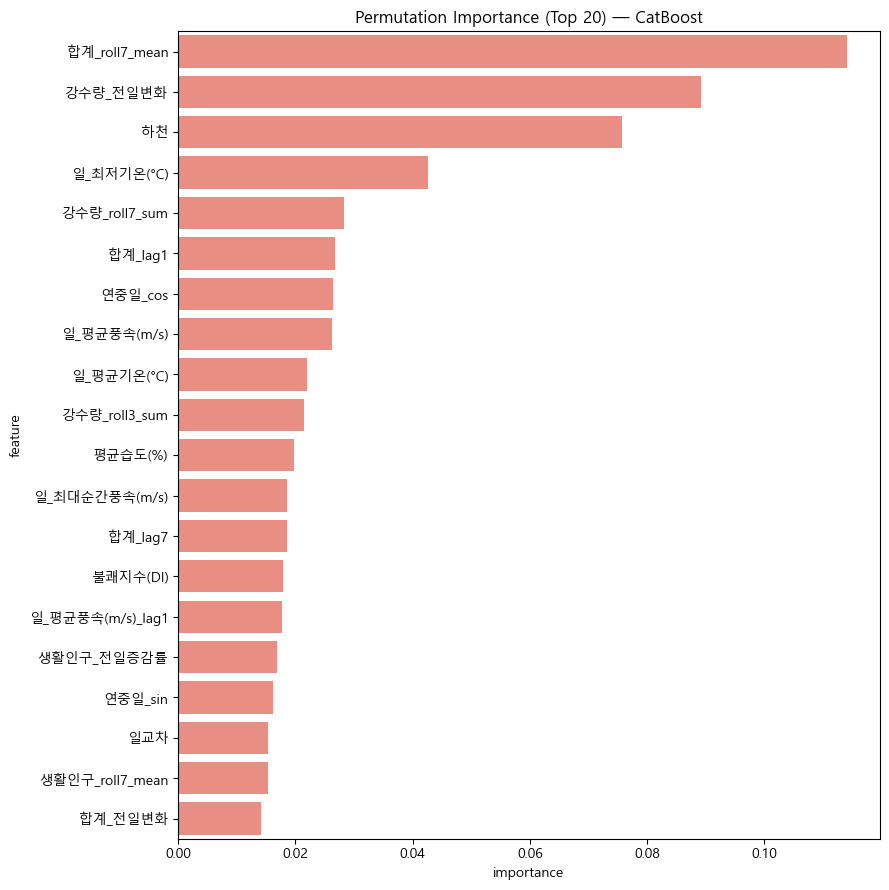

feature  importance       std
46     Ìï©Í≥Ñ_roll7_mean    0.114040  0.003475
54          Í∞ïÏàòÎüâ_Ï†ÑÏùºÎ≥ÄÌôî    0.089160  0.003234
6                 ÌïòÏ≤ú    0.075657  0.002396
9         Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)    0.042679  0.000974
50     Í∞ïÏàòÎüâ_roll7_sum    0.028317  0.000983
38           Ìï©Í≥Ñ_lag1    0.026726  0.001048
24           Ïó∞Ï§ëÏùº_cos    0.026480  0.001088
12       Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)    0.026217  0.001055
10        Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)    0.021963  0.000785
49     Í∞ïÏàòÎüâ_roll3_sum    0.021470  0.000939
15           ÌèâÍ∑†ÏäµÎèÑ(%)    0.019725  0.001640
13     Ïùº_ÏµúÎåÄÏàúÍ∞ÑÌíçÏÜç(m/s)    0.018623  0.000541
40           Ìï©Í≥Ñ_lag7    0.018517  0.001015
7           Î∂àÏæåÏßÄÏàò(DI)    0.017899  0.000707
37  Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)_lag1    0.017672  0.000598
53        ÏÉùÌôúÏù∏Íµ¨_Ï†ÑÏùºÏ¶ùÍ∞êÎ•†    0.016813  0.000562
23           Ïó∞Ï§ëÏùº_sin    0.016231  0.000540
55               ÏùºÍµêÏ∞®    0.015412  0.000587
48   ÏÉùÌôúÏù∏Íµ¨_roll7_mean    0.015345  0.000961
52           Ìï©Í≥Ñ_Ï†ÑÏùºÎ≥ÄÌôî    0.014159  0.000450

In [ ]:
# %% [markdown]
# ## 5) Permutation Importance (Best Î™®Îç∏ Í∏∞Ï§Ä)
# - CV ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏ ÌïòÎÇòÎ•º Í≥®Îùº Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï© ÌõÑ Permutation Importance Í≥ÑÏÇ∞
# - n_repeatsÎäî ÏÉÅÌô©Ïóê Îî∞Îùº ÎäòÎ¶¥ Ïàò ÏûàÏùå (ÏãúÍ∞Ñ Ï¶ùÍ∞Ä)

# %%
best_name = min(cv_scores, key=lambda k: cv_scores[k][0])  # RMSE ÌèâÍ∑† ÏµúÏÜå Î™®Îç∏ ÏÑ†ÌÉù
best_model = models[best_name]
print(f"[INFO] Best model by CV: {best_name}")

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï†ÅÌï©(ÏÑ§Î™ÖÏö©)
best_model.fit(X, y)

perm = permutation_importance(best_model, X, y, n_repeats=8, random_state=42)

perm_df = (pd.DataFrame({
    "feature": X.columns,
    "importance": perm.importances_mean,
    "std": perm.importances_std
}).sort_values("importance", ascending=False))

plt.figure(figsize=(9, 0.45*min(20, len(perm_df))))
sns.barplot(data=perm_df.head(20), x="importance", y="feature", color="salmon")
plt.title(f"Permutation Importance (Top 20) ‚Äî {best_name}")
plt.tight_layout()
plt.show()

perm_df.head(20)


c:\Users\user\anaconda3\envs\young\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


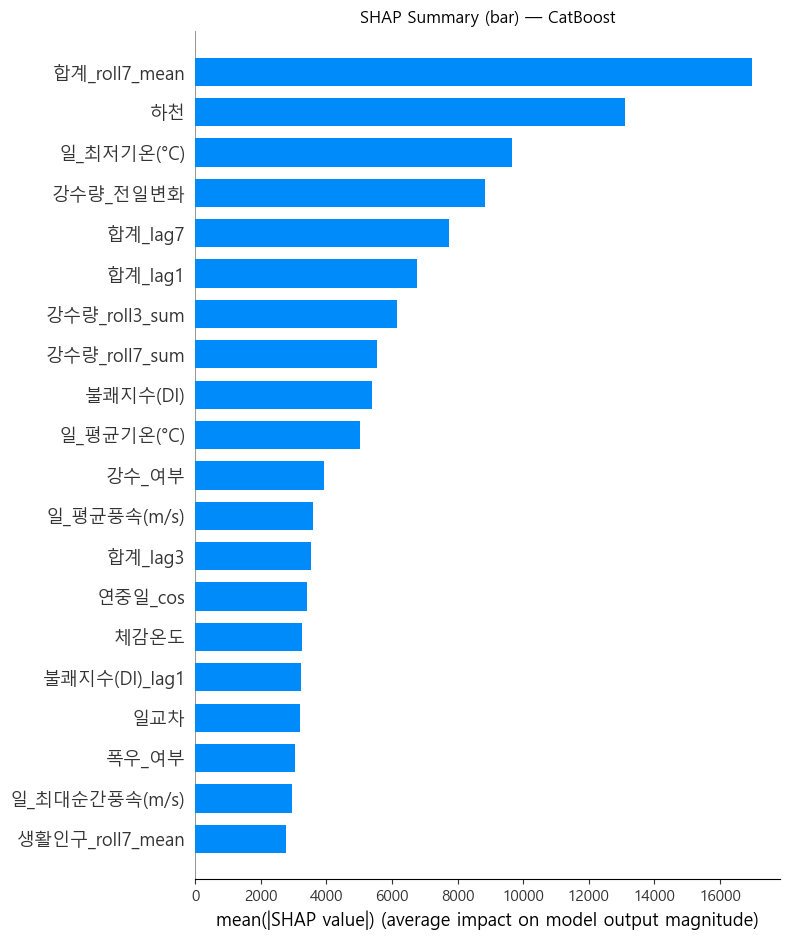

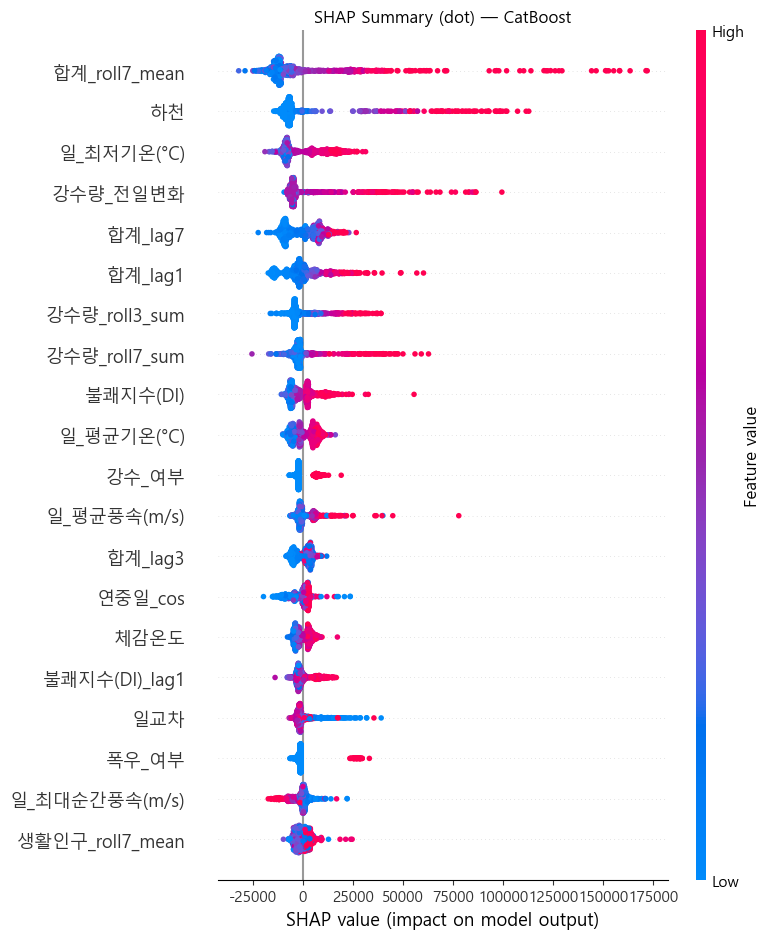

In [ ]:
# %% [markdown]
# ## 6) SHAP (ÏÑ†ÌÉù) ‚Äî Tree Í≥ÑÏó¥ Î™®Îç∏Ïóê Ï†ÅÌï©
# - ÏÑ§Ïπò ÌïÑÏöî: shap
# - Ìï¥ÏÑù: summary_plot(bar) = Ï†ÑÎ∞òÏ†Å Ï§ëÏöîÎèÑ, summary_plot(dot) = ÏòÅÌñ• Î∞©Ìñ•/Î∂ÑÌè¨
# - Îç∞Ïù¥ÌÑ∞Í∞Ä ÌÅ¨Î©¥ ÏÉòÌîåÎßÅ ÏÇ¨Ïö© Í∂åÏû•

# %%
try:
    import shap
    shap.initjs()

    # TreeExplainerÎäî Ìä∏Î¶¨ Í≥ÑÏó¥Ïóê ÏµúÏ†ÅÌôî (RF/XGB/LGBM/CatBoost)
    explainer = shap.TreeExplainer(best_model)
    # Í≥ÑÏÇ∞Îüâ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ ÏùºÎ∂Ä ÏÉòÌîåÎßå (Ïòà: 1000Í∞ú)
    nsample = min(1000, len(X))
    X_sample = X.sample(nsample, random_state=42)

    shap_values = explainer.shap_values(X_sample)

    # Ï†ÑÎ∞òÏ†Å Ï§ëÏöîÎèÑ (bar)
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title(f"SHAP Summary (bar) ‚Äî {best_name}")
    plt.tight_layout()
    plt.show()

    # ÏòÅÌñ• Î∞©Ìñ•/Î∂ÑÌè¨ (dot)
    shap.summary_plot(shap_values, X_sample, show=False)
    plt.title(f"SHAP Summary (dot) ‚Äî {best_name}")
    plt.tight_layout()
    plt.show()

    # Îã®Ïùº ÏÉòÌîå force_plot (ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎßå Ïù∏ÌÑ∞ÎûôÌã∞Î∏å)
    one_idx = X_sample.index[0]
    shap.force_plot(explainer.expected_value, shap_values[0], X_sample.iloc[0,:])
except Exception as e:
    print("[WARN] SHAP Ïã§Ìñâ Í±¥ÎÑàÎúÄ:", e)


In [ ]:
# %% [markdown]
# ## 7) LIME (ÏÑ†ÌÉù) ‚Äî Îã®Ïùº ÏòàÏ∏°Ïóê ÎåÄÌïú ÏßÄÏó≠Ï†Å ÏÑ§Î™Ö
# - ÏÑ§Ïπò ÌïÑÏöî: lime
# - ÏàòÏπòÌòï Ï†ÑÏ≤òÎ¶¨ ÏóÜÏù¥ÎèÑ ÎèôÏûëÌïòÏßÄÎßå, Ïä§ÏºÄÏùºÏù¥ Îß§Ïö∞ Îã§Î•¥Î©¥ ÌëúÏ§ÄÌôî ÌõÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÑ Í∂åÏû•

# %%
try:
    from lime.lime_tabular import LimeTabularExplainer

    # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú LIME ÏÑ§Î™ÖÏûê ÏÉùÏÑ±
    explainer = LimeTabularExplainer(
        training_data=np.array(X),
        feature_names=X.columns.tolist(),
        mode='regression',
        discretize_continuous=False  # Ïó∞ÏÜçÌòï Í∑∏ÎåÄÎ°ú
    )

    # ÏûÑÏùòÏùò ÏÉòÌîå 1Í∞ú ÏÑ†ÌÉù
    i = np.random.randint(0, len(X))
    x_i = np.array(X.iloc[i])
    exp = explainer.explain_instance(
        data_row=x_i,
        predict_fn=best_model.predict,
        num_features=10
    )
    # ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî exp.show_in_notebook() Í∞ÄÎä•
    print("[LIME] sample index:", i)
    for feat, weight in exp.as_list():
        print(f"{feat:60s} {weight:+.4f}")

except Exception as e:
    print("[WARN] LIME Ïã§Ìñâ Í±¥ÎÑàÎúÄ:", e)


[LIME] sample index: 612
ÌïòÏ≤ú                                                           +22540.3167
Ïùº_ÌèâÍ∑†ÌíçÏÜç(m/s)_lag1                                             -12069.7535
Ïùº_ÌèâÍ∑†Í∏∞Ïò®(¬∞C)                                                   +9166.4382
Ïùº_ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)                                                   +8754.3028
Ïó∞Ï§ëÏùº_sin                                                      +6298.8285
Î∂àÏæåÏßÄÏàò(DI)                                                     +5394.9812
Ïùº_ÏµúÍ≥†Í∏∞Ïò®(¬∞C)_lag3                                              -4334.8143
Ï≤¥Í∞êÏò®ÎèÑ                                                         +4157.2550
Ï≤¥Î†•Îã®Î†®Ïû•ÏóÖ                                                       -3141.7246
ÏÉùÌôúÏù∏Íµ¨_lag7                                                    -2493.7888


In [ ]:
# %% [markdown]
# ## 1) ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã(X, y) Íµ¨ÏÑ±
# - ÌÉÄÍπÉ: Ìï©Í≥Ñ_1ÏùºÌõÑ (shift(-1))
# - ÌîºÏ≤ò: Ïò§ÎäòÍπåÏßÄ Ï†ïÎ≥¥ + ÏàúÌôò Ïù∏ÏΩîÎî© + ÎùºÍ∑∏/Î°§ÎßÅ + Ïù¥Î≤§Ìä∏/Ïù∏ÌóàÍ∞Ä
# - dropnaÎ°ú ÎùºÍ∑∏/Î°§ÎßÅ Ï¥àÎ∞ò Í≤∞Ï∏° Ï†úÍ±∞

# %%
target = 'Ìï©Í≥Ñ_1ÏùºÌõÑ'
feature_cols = [
    # Í≥ÑÏ†àÏÑ±(ÏàúÌôò)
    'Ïõî_sin','Ïõî_cos','ÏöîÏùº_sin','ÏöîÏùº_cos','Ïó∞Ï§ëÏùº_sin','Ïó∞Ï§ëÏùº_cos',
    # ÏûêÍ∏∞ÏÉÅÍ¥Ä/ÏßÄÏó∞
    'Ìï©Í≥Ñ_lag1','Ìï©Í≥Ñ_lag3','Ìï©Í≥Ñ_lag7',
    'ÏÉùÌôúÏù∏Íµ¨_lag1','ÏÉùÌôúÏù∏Íµ¨_lag3','ÏÉùÌôúÏù∏Íµ¨_lag7',
    'Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)_lag1','Ïùº_ÏùºÍ∞ïÏàòÎüâ(mm)_lag3',
    # Î°§ÎßÅ(Ïò§ÎäòÍπåÏßÄ)
    'Ìï©Í≥Ñ_roll7_mean','Ìï©Í≥Ñ_roll7_std',
    'ÏÉùÌôúÏù∏Íµ¨_roll7_mean',
    'Í∞ïÏàòÎüâ_roll3_sum','Í∞ïÏàòÎüâ_roll7_sum',
    # Î≥ÄÌôî/Ïù¥Î≤§Ìä∏/ÎÇ†Ïî®
    'Ìï©Í≥Ñ_Ï†ÑÏùºÏ¶ùÍ∞êÎ•†','Ìï©Í≥Ñ_Ï†ÑÏùºÎ≥ÄÌôî','ÏÉùÌôúÏù∏Íµ¨_Ï†ÑÏùºÏ¶ùÍ∞êÎ•†','Í∞ïÏàòÎüâ_Ï†ÑÏùºÎ≥ÄÌôî',
    'ÏùºÍµêÏ∞®','Ï≤¥Í∞êÏò®ÎèÑ','ÏäµÎèÑÏ∞®Ïù¥','Í∞ïÏàò_Ïó¨Î∂Ä','Ìè≠Ïö∞_Ïó¨Î∂Ä','Ìè≠ÏóºÏùº','ÌïúÌåå_Ïó¨Î∂Ä',
    # ÎäêÎ¶∞ Ï∂îÏÑ∏
    'Ïù∏ÌóàÍ∞Ä','Ïù∏ÌóàÍ∞Ä_ÎàÑÏ†Å',
    # Î≥¥Í∞ïÏö© Ï†ïÏàòÌòï Í≥ÑÏ†à/ÏæåÏ†ÅÎèÑ(ÏàúÌôòÍ≥º Ìï®Íªò Ïì∞Îêò, Ìä∏Î¶¨ Î™®Îç∏Ïù¥Î©¥ Î¨∏Ï†ú ÏóÜÏùå)
    'Í≥ÑÏ†à','Î∂àÏæåÏßÄÏàòÎì±Í∏â'
]

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÇ¨Ïö©(ÏïàÏ†Ñ)
feature_cols = [c for c in feature_cols if c in nanji.columns]

df_model = nanji[['ÎÇ†Ïßú', target] + feature_cols].dropna().reset_index(drop=True)
X = df_model[feature_cols].copy()
y = df_model[target].copy()

print("[INFO] X, y shape:", X.shape, y.shape)
print("[INFO] Í∏∞Í∞Ñ:", df_model['ÎÇ†Ïßú'].min(), "‚Üí", df_model['ÎÇ†Ïßú'].max())


[INFO] X, y shape: (3064, 33) (3064,)
[INFO] Í∏∞Í∞Ñ: 2017-01-08 00:00:00 ‚Üí 2025-05-29 00:00:00


In [ ]:
# %% [markdown]
# ## 2) ÏãúÍ≥ÑÏó¥ Î∂ÑÌï† ÌïôÏäµ/ÌèâÍ∞Ä (Baseline: RandomForest)
# - shuffle=False
# - RMSE/MAE Ï∂úÎ†•
# - Ï§ëÏöîÎèÑ(ÎÇ¥Ïû•) + Permutation Importance

# %%
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tscv = TimeSeriesSplit(n_splits=5)
rmse_list, mae_list = [], []

rf_models = []  # Ï∂îÌõÑ SHAP Îì± Ïì∞Í≥† Ïã∂ÏúºÎ©¥ Î≥¥Í¥Ä

for fold, (tr_idx, te_idx) in enumerate(tscv.split(X), 1):
    X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
    
    rf = RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_tr, y_tr)
    pred = rf.predict(X_te)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    mae  = mean_absolute_error(y_te, pred)
    rmse_list.append(rmse); mae_list.append(mae)
    rf_models.append(rf)
    print(f"[Fold {fold}] RMSE={rmse:,.0f} | MAE={mae:,.0f}")

print(f"\n[CV] RMSE: {np.mean(rmse_list):,.0f} ¬± {np.std(rmse_list):,.0f}")
print(f"[CV] MAE : {np.mean(mae_list):,.0f} ¬± {np.std(mae_list):,.0f}")


[Fold 1] RMSE=110,222 | MAE=83,476
[Fold 2] RMSE=79,794 | MAE=50,268
[Fold 3] RMSE=89,416 | MAE=62,995
[Fold 4] RMSE=108,798 | MAE=69,615
[Fold 5] RMSE=74,297 | MAE=48,818

[CV] RMSE: 92,505 ¬± 14,711
[CV] MAE : 63,035 ¬± 12,855


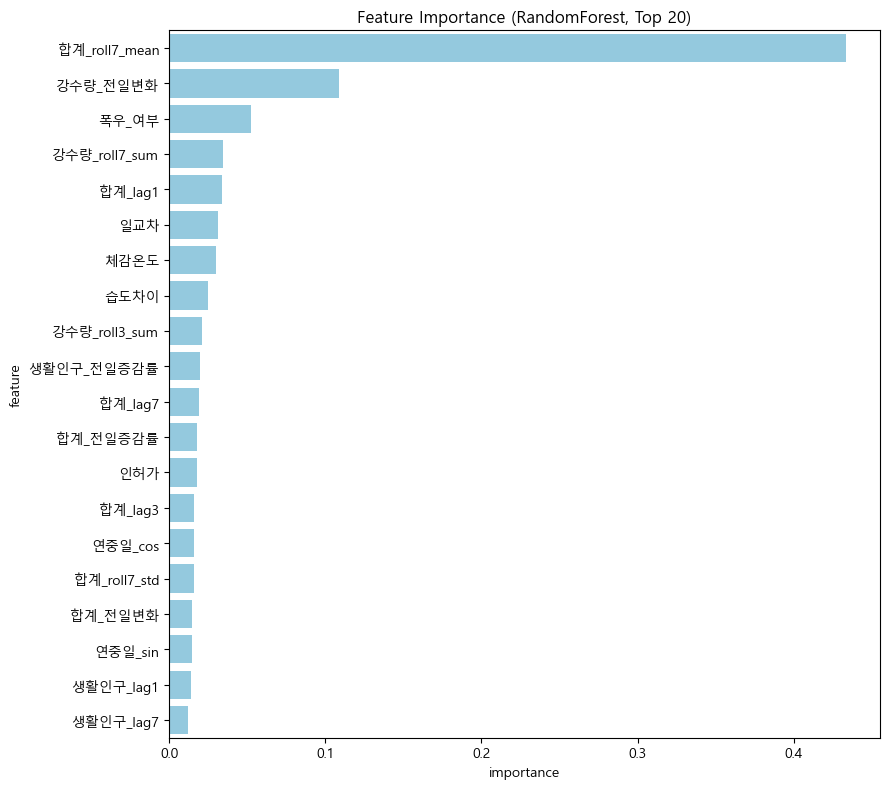

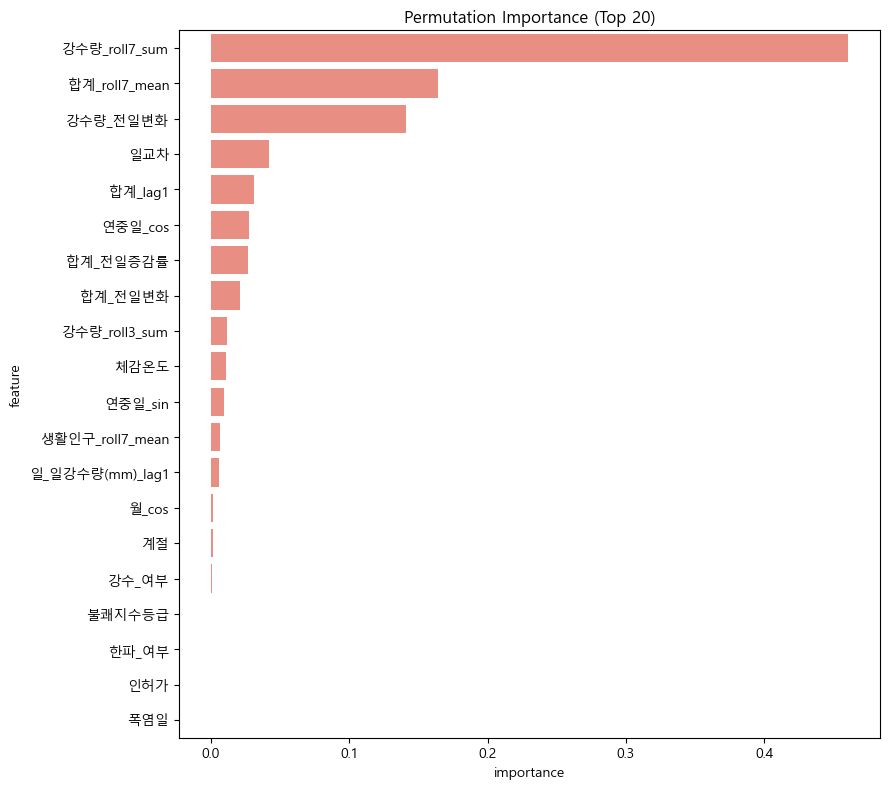

In [ ]:
# %% [markdown]
# ## 3) Feature Importance (ÎÇ¥Ïû•) + Permutation Importance
# - seaborn 0.14 Í≤ΩÍ≥† ÌîºÌïòÍ∏∞ ÏúÑÌï¥ hue ÏßÄÏ†ï ÎòêÎäî Îã®ÏÉâ ÏÇ¨Ïö©

# %%
# (a) ÎÇ¥Ïû• feature_importances_ (ÎßàÏßÄÎßâ fold Î™®Îç∏ ÏòàÏãú)
rf_last = rf_models[-1]
fi = (
    pd.DataFrame({'feature': X.columns, 'importance': rf_last.feature_importances_})
    .sort_values('importance', ascending=False)
)

plt.figure(figsize=(9,8))
sns.barplot(data=fi.head(20), x='importance', y='feature', color='skyblue')
plt.title("Feature Importance (RandomForest, Top 20)")
plt.tight_layout()
plt.show()

# (b) Permutation Importance (ÎßàÏßÄÎßâ foldÏùò ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Í∏∞Ï§Ä)
#   - Îçî ÏßÅÍ¥ÄÏ†Å: Ìï¥Îãπ featureÎ•º ÏÑûÏúºÎ©¥ ÏÑ±Îä•Ïù¥ ÏñºÎßàÎÇò Îñ®Ïñ¥ÏßÄÎÇò?
X_tr, X_te = X.iloc[tscv.split(X).__next__()[0]], X.iloc[tscv.split(X).__next__()[1]]  # Ï≤´ fold Ïû¨Íµ¨ÏÑ±Ïö©
y_tr, y_te = y.iloc[tscv.split(X).__next__()[0]], y.iloc[tscv.split(X).__next__()[1]]

rf_last.fit(X_tr, y_tr)
perm = permutation_importance(rf_last, X_te, y_te, n_repeats=10, random_state=42)
perm_df = (
    pd.DataFrame({'feature': X.columns, 'importance': perm.importances_mean})
    .sort_values('importance', ascending=False)
)

plt.figure(figsize=(9,8))
sns.barplot(data=perm_df.head(20), x='importance', y='feature', color='salmon')
plt.title("Permutation Importance (Top 20)")
plt.tight_layout()
plt.show()
